In [1]:
# !pip install pandas numpy matplotlib statsmodels pandas_datareader datetime yfinance scikit-learn PyPortfolioOpt pandas-ta

In [2]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import pandas as pd 
import numpy as np 
import datetime as dt 
import yfinance as yf 
import pandas_ta
import warnings 
warnings.filterwarnings('ignore')

In [3]:
import yfinance as yf
import pandas as pd

# Define the list of cryptocurrency symbols
crypto_symbols = ["BTC-USD", "ETH-USD", "USDT-USD", "BNB-USD", "SOL-USD", "XRP-USD", "USDC-USD", "ADA-USD", "AVAX-USD", "DOGE-USD",
                   "LINK-USD", "TRX-USD", "DOT-USD", "MATIC-USD", "TONCOIN-USD", "WBTC-USD", "ICP-USD", "SHIB-USD", "DAI-USD", "LTC-USD",
                   "BCH-USD", "LEO-USD", "UNI-USD", "ETC-USD", "ATOM-USD", "APT-USD", "XLM-USD", "XMR-USD", "IMX-USD", "TIA-USD", 
                   "OKB-USD", "NEAR-USD", "INJ-USD", "OP-USD", "FIL-USD", "FDUSD-USD", "LDO-USD", "HBAR-USD", "KAS-USD", "ARB-USD", 
                   "STX-USD", "CRO-USD", "VET-USD", "MNT-USD", "MKR-USD", "RNDR-USD", "SUI-USD", "SEI-USD", "GRT-USD", "RUNE-USD",
                   "HEX-USD", "ALGO-USD", "MINA-USD", "AAVE-USD", "QNT-USD", "HNT-USD", "ORDI-USD", "FLOW-USD", "ASTR-USD", "FTM-USD",
                   "THETA-USD", "SAND-USD", "AXS-USD", "XTZ-USD", "FLR-USD", "KCS-USD", "SNX-USD", "RON-USD", "CHZ-USD", "BGB-USD",
                   "SATS-USD", "BEAM-USD", "CHEEL-USD", "WEMIX-USD", "MANA-USD", "DYDX-USD", "CFX-USD", "ROSE-USD", "EOS-USD", "BTT-USD",
                   "FXS-USD", "NEO-USD", "OSMO-USD", "IOTA-USD", "KAVA-USD", "PYTH-USD", "JUP-USD", "BLUR-USD", "USDD-USD",
                   "MANTA-USD", "WBNB-USD", "PENDLE-USD", "KLAY-USD", "FRAX-USD", "BONK-USD", "WOO-USD", "CAKE-USD", "AKT-USD",
                   "MSOL-USD", "XDC-USD", "GALA-USD", "VBNB-USD", "XEC-USD", "LUNC-USD", "FTT-USD", "GNO-USD", "RPL-USD",
                   "AR-USD", "ENS-USD", "APE18876-USD", "XAUT-USD", "AXL17799-USD", "CRV-USD", "SC-USD", "NEXO-USD",
                   "CBETH-USD", "TWT-USD", "HT-USD", "GT-USD", "RLB-USD", "1INCH-USD", "FET-USD", "FTN-USD", "STRD-USD",
                   "COMP5692-USD", "GMT18069-USD", "PAXG-USD", "CSPR-USD", "XRD-USD", "LUNA20314-USD", "CORE23254-USD",
                   "NFT9816-USD", "GMX11857-USD", "BTG-USD", "ELF-USD", "ENJ-USD", "KUJI-USD", "PEPE24478-USD", "METIS-USD",
                   "IOTX-USD", "GAS-USD", "SKL-USD", "WKAVA-USD", "ZEC-USD", "USDP-USD", "AGIX-USD", "CELO-USD", "ZIL-USD",
                   "POKT-USD", "MAGIC14783-USD", "ALT29073-USD", "UMA-USD", "ORBR-USD", "BAT-USD", "HOT2682-USD", "KSM-USD",
                   "DASH-USD", "MASK8536-USD", "XEM-USD", "LRC-USD", "DESO-USD", "AZERO-USD", "PYUSD-USD", "QTUM-USD",
                   "HBTC-USD", "XCH-USD", "SSV-USD", "NTRN26680-USD", "TRB-USD", "SUPER8290-USD", "GLMR-USD", "ONDO-USD",
                   "API3-USD", "ETHW-USD", "SFP-USD", "MX-USD", "WLD-USD", "ILV-USD", "CVX-USD", "TRAC-USD", "ZRX-USD",
                   "TFUEL-USD", "BDX-USD", "ADF-USD", "FLOKI-USD", "RAY-USD", "JASMY-USD", "LYX-USD", "JST-USD"]



# Define start and end dates
end_date = '2024-01-01'
start_date = pd.to_datetime(end_date) - pd.DateOffset(days=365*10)

# Download historical data for the specified symbols and date range
crypto_data = yf.download(tickers=crypto_symbols, start=start_date, end=end_date).stack(level=1)
crypto_data.index.names = ['Date', 'Ticker']  # Set the column headings for the index levels

# Display the downloaded data
print(crypto_data.head())

[*********************100%%**********************]  189 of 189 completed


3 Failed downloads:
['ONDO-USD', 'MANTA-USD', 'ALT29073-USD']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")



                     Adj Close       Close        High         Low  \
Date       Ticker                                                    
2014-09-17 BTC-USD  457.334015  457.334015  468.174011  452.421997   
           LTC-USD    5.058550    5.058550    5.170770    4.965950   
2014-09-18 BTC-USD  424.440002  424.440002  456.859985  413.104004   
           LTC-USD    4.685230    4.685230    5.065430    4.579960   
2014-09-19 BTC-USD  394.795990  394.795990  427.834991  384.532013   

                          Open      Volume  
Date       Ticker                           
2014-09-17 BTC-USD  465.864014  21056800.0  
           LTC-USD    5.085890   3071840.0  
2014-09-18 BTC-USD  456.859985  34483200.0  
           LTC-USD    5.065430   4569260.0  
2014-09-19 BTC-USD  424.102997  37919700.0  


In [4]:
crypto_data

Adj Close       Close        High         Low  \
Date       Ticker                                                    
2014-09-17 BTC-USD  457.334015  457.334015  468.174011  452.421997   
           LTC-USD    5.058550    5.058550    5.170770    4.965950   
2014-09-18 BTC-USD  424.440002  424.440002  456.859985  413.104004   
           LTC-USD    4.685230    4.685230    5.065430    4.579960   
2014-09-19 BTC-USD  394.795990  394.795990  427.834991  384.532013   
...                        ...         ...         ...         ...   
2023-12-31 XRP-USD    0.614941    0.614941    0.627576    0.611208   
           XTZ-USD    1.007835    1.007835    1.040141    0.997241   
           ZEC-USD   26.904694   26.904694   28.783470   26.758741   
           ZIL-USD    0.024776    0.024776    0.025604    0.024542   
           ZRX-USD    0.370244    0.370244    0.385237    0.361108   

                          Open       Volume  
Date       Ticker                            
2014-09-17 BTC-USD  465.864014   21056800.0  
           LTC-USD    5.085890    3071840.0  
2014-09-18 BTC-USD  456.859985   34483200.0  
           LTC-USD    5.065430    4569260.0  
2014-09-19 BTC-USD  424.102997   37919700.0  
...                        ...          ...  
2023-12-31 XRP-USD    0.621792  710033547.0  
           XTZ-USD    1.019325   17491304.0  
           ZEC-USD   28.703098   68436753.0  
           ZIL-USD    0.025020   19070187.0  
           ZRX-USD    0.365860   28986957.0  

[248172 rows x 6 columns]

In [5]:
crypto_data.index.names = ["date", 'ticker']
crypto_data.columns = crypto_data.columns.str.lower()
crypto_data

adj close       close        high         low  \
date       ticker                                                    
2014-09-17 BTC-USD  457.334015  457.334015  468.174011  452.421997   
           LTC-USD    5.058550    5.058550    5.170770    4.965950   
2014-09-18 BTC-USD  424.440002  424.440002  456.859985  413.104004   
           LTC-USD    4.685230    4.685230    5.065430    4.579960   
2014-09-19 BTC-USD  394.795990  394.795990  427.834991  384.532013   
...                        ...         ...         ...         ...   
2023-12-31 XRP-USD    0.614941    0.614941    0.627576    0.611208   
           XTZ-USD    1.007835    1.007835    1.040141    0.997241   
           ZEC-USD   26.904694   26.904694   28.783470   26.758741   
           ZIL-USD    0.024776    0.024776    0.025604    0.024542   
           ZRX-USD    0.370244    0.370244    0.385237    0.361108   

                          open       volume  
date       ticker                            
2014-09-17 BTC-USD  465.864014   21056800.0  
           LTC-USD    5.085890    3071840.0  
2014-09-18 BTC-USD  456.859985   34483200.0  
           LTC-USD    5.065430    4569260.0  
2014-09-19 BTC-USD  424.102997   37919700.0  
...                        ...          ...  
2023-12-31 XRP-USD    0.621792  710033547.0  
           XTZ-USD    1.019325   17491304.0  
           ZEC-USD   28.703098   68436753.0  
           ZIL-USD    0.025020   19070187.0  
           ZRX-USD    0.365860   28986957.0  

[248172 rows x 6 columns]

## Indicators

In [6]:
crypto_data["rsi"] = crypto_data.groupby(level = 1)['adj close'].transform(lambda x : pandas_ta.rsi(close =x, length = 20))
crypto_data

adj close       close        high         low  \
date       ticker                                                    
2014-09-17 BTC-USD  457.334015  457.334015  468.174011  452.421997   
           LTC-USD    5.058550    5.058550    5.170770    4.965950   
2014-09-18 BTC-USD  424.440002  424.440002  456.859985  413.104004   
           LTC-USD    4.685230    4.685230    5.065430    4.579960   
2014-09-19 BTC-USD  394.795990  394.795990  427.834991  384.532013   
...                        ...         ...         ...         ...   
2023-12-31 XRP-USD    0.614941    0.614941    0.627576    0.611208   
           XTZ-USD    1.007835    1.007835    1.040141    0.997241   
           ZEC-USD   26.904694   26.904694   28.783470   26.758741   
           ZIL-USD    0.024776    0.024776    0.025604    0.024542   
           ZRX-USD    0.370244    0.370244    0.385237    0.361108   

                          open       volume        rsi  
date       ticker                                       
2014-09-17 BTC-USD  465.864014   21056800.0        NaN  
           LTC-USD    5.085890    3071840.0        NaN  
2014-09-18 BTC-USD  456.859985   34483200.0        NaN  
           LTC-USD    5.065430    4569260.0        NaN  
2014-09-19 BTC-USD  424.102997   37919700.0        NaN  
...                        ...          ...        ...  
2023-12-31 XRP-USD    0.621792  710033547.0  48.291599  
           XTZ-USD    1.019325   17491304.0  56.572724  
           ZEC-USD   28.703098   68436753.0  40.549518  
           ZIL-USD    0.025020   19070187.0  53.983561  
           ZRX-USD    0.365860   28986957.0  49.002892  

[248172 rows x 7 columns]

In [7]:
# We need to create a function to calculate the Average True Range(ATR)

def compute_atr(stock_data):
    atr = pandas_ta.atr(high= stock_data['high'],
    low = stock_data['low'],
    close =stock_data['close'],
    length=14)
    return atr.sub(atr.mean()).div(atr.std())
# the pandas_ta.art() method requires High, low, close and period data to be specified
# we dont return the atr value directly, instead we normalise the atr value by subtracting the mean value and dividing by standard dev
# why do we normalise ? Because we want to feed this to an ML model and do clustering later for which data needs to be normalised

crypto_data['atr']= crypto_data.groupby(level=1, group_keys = False).apply(compute_atr)

In [8]:
crypto_data

adj close       close        high         low  \
date       ticker                                                    
2014-09-17 BTC-USD  457.334015  457.334015  468.174011  452.421997   
           LTC-USD    5.058550    5.058550    5.170770    4.965950   
2014-09-18 BTC-USD  424.440002  424.440002  456.859985  413.104004   
           LTC-USD    4.685230    4.685230    5.065430    4.579960   
2014-09-19 BTC-USD  394.795990  394.795990  427.834991  384.532013   
...                        ...         ...         ...         ...   
2023-12-31 XRP-USD    0.614941    0.614941    0.627576    0.611208   
           XTZ-USD    1.007835    1.007835    1.040141    0.997241   
           ZEC-USD   26.904694   26.904694   28.783470   26.758741   
           ZIL-USD    0.024776    0.024776    0.025604    0.024542   
           ZRX-USD    0.370244    0.370244    0.385237    0.361108   

                          open       volume        rsi       atr  
date       ticker                                                 
2014-09-17 BTC-USD  465.864014   21056800.0        NaN       NaN  
           LTC-USD    5.085890    3071840.0        NaN       NaN  
2014-09-18 BTC-USD  456.859985   34483200.0        NaN       NaN  
           LTC-USD    5.065430    4569260.0        NaN       NaN  
2014-09-19 BTC-USD  424.102997   37919700.0        NaN       NaN  
...                        ...          ...        ...       ...  
2023-12-31 XRP-USD    0.621792  710033547.0  48.291599 -0.363951  
           XTZ-USD    1.019325   17491304.0  56.572724 -0.736524  
           ZEC-USD   28.703098   68436753.0  40.549518 -0.588318  
           ZIL-USD    0.025020   19070187.0  53.983561 -0.583360  
           ZRX-USD    0.365860   28986957.0  49.002892 -0.559859  

[248172 rows x 8 columns]

In [9]:
crypto_data['dollar_volume'] = (crypto_data['adj close']*crypto_data['volume'])/1e6
## dollar vol is simple to calc, we div by 1e6 because there is millions of dollars traded everyday, for viewing simplicity
crypto_data

adj close       close        high         low  \
date       ticker                                                    
2014-09-17 BTC-USD  457.334015  457.334015  468.174011  452.421997   
           LTC-USD    5.058550    5.058550    5.170770    4.965950   
2014-09-18 BTC-USD  424.440002  424.440002  456.859985  413.104004   
           LTC-USD    4.685230    4.685230    5.065430    4.579960   
2014-09-19 BTC-USD  394.795990  394.795990  427.834991  384.532013   
...                        ...         ...         ...         ...   
2023-12-31 XRP-USD    0.614941    0.614941    0.627576    0.611208   
           XTZ-USD    1.007835    1.007835    1.040141    0.997241   
           ZEC-USD   26.904694   26.904694   28.783470   26.758741   
           ZIL-USD    0.024776    0.024776    0.025604    0.024542   
           ZRX-USD    0.370244    0.370244    0.385237    0.361108   

                          open       volume        rsi       atr  \
date       ticker                                                  
2014-09-17 BTC-USD  465.864014   21056800.0        NaN       NaN   
           LTC-USD    5.085890    3071840.0        NaN       NaN   
2014-09-18 BTC-USD  456.859985   34483200.0        NaN       NaN   
           LTC-USD    5.065430    4569260.0        NaN       NaN   
2014-09-19 BTC-USD  424.102997   37919700.0        NaN       NaN   
...                        ...          ...        ...       ...   
2023-12-31 XRP-USD    0.621792  710033547.0  48.291599 -0.363951   
           XTZ-USD    1.019325   17491304.0  56.572724 -0.736524   
           ZEC-USD   28.703098   68436753.0  40.549518 -0.588318   
           ZIL-USD    0.025020   19070187.0  53.983561 -0.583360   
           ZRX-USD    0.365860   28986957.0  49.002892 -0.559859   

                    dollar_volume  
date       ticker                  
2014-09-17 BTC-USD    9629.990885  
           LTC-USD      15.539056  
2014-09-18 BTC-USD   14636.049492  
           LTC-USD      21.408033  
2014-09-19 BTC-USD   14970.545502  
...                           ...  
2023-12-31 XRP-USD     436.628740  
           XTZ-USD      17.628349  
           ZEC-USD    1841.269871  
           ZIL-USD       0.472483  
           ZRX-USD      10.732247  

[248172 rows x 9 columns]

In [10]:
last_cols = [c for c in crypto_data.columns.unique(0) if c not in ['dollar_volume', 'open', 'high', 'low', 'close', 'volume']]
last_cols
data = (pd.concat([crypto_data.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume'), crypto_data.unstack()[last_cols].resample('M').last().stack('ticker')], axis = 1)).dropna()
data

dollar_volume   adj close        rsi       atr
date       ticker                                                   
2014-10-31 BTC-USD     10404.968911  338.321014  38.047992 -0.750538
           LTC-USD        15.151352    3.754000  39.361054 -0.728275
2014-11-30 BTC-USD      8232.224831  378.046997  52.042278 -0.748729
           LTC-USD        12.898034    3.576090  42.772293 -0.730815
2014-12-31 BTC-USD      6028.810976  320.192993  42.645996 -0.756074
...                             ...         ...        ...       ...
2023-12-31 FDUSD-USD    2696.418657    0.998690  45.534671  1.650231
           SEI-USD       155.735138    0.563039  71.420849  3.417136
           PYUSD-USD       8.155466    1.000764   0.100709 -0.492510
           IOTA-USD       26.698274    0.310756  59.433126  1.097746
           PYTH-USD       32.404730    0.324100  43.466765 -1.636686

[8128 rows x 4 columns]

In [11]:
data['dollar_volume'] = (data.loc[:, 'dollar_volume'].unstack('ticker').rolling(2*12, min_periods=12).mean().stack())
# above accesses all the data in the dol_vol col and unstacks it by ticker level; so we get all the data of one stock at a time.
# then on this data first we define the rolling period which is 5 years; since previously we have aggregated at monthly level
# we do 5*12 and then take the mean. (mean will be of the dol_vol for the past 60 months (5*12))
data['dollar_volume_rank'] = (data.groupby('date')['dollar_volume'].rank(ascending = False))
# now we need to rank the stocks based on their dollar_vol; the above does the following
# first takes the previous unstacked data nad groups it by date; i.e on a montly level
# then it ranks the datapoints (stocks) based on the dollar_vol
data = data[data['dollar_volume_rank']<150].drop(['dollar_volume', 'dollar_volume_rank'], axis=1)
data

adj close        rsi       atr
date       ticker                                        
2015-09-30 BTC-USD        236.059998  49.325047 -0.763071
           LTC-USD          3.009780  48.773875 -0.731760
2015-10-31 BTC-USD        314.165985  73.011948 -0.758234
           LTC-USD          3.804330  67.695540 -0.725653
2015-11-30 BTC-USD        377.321014  63.633196 -0.750182
...                              ...        ...       ...
2023-12-31 KAS-USD          0.112204  49.248465  2.660131
           ETHW-USD         3.327518  55.562795 -0.268693
           CBETH-USD     2411.353271  54.967872  1.596586
           AXL17799-USD     1.187598  64.940733  2.104325
           FLR-USD          0.017555  57.764677 -0.227857

[6038 rows x 3 columns]

In [12]:
def calculate_returns(df):
    lags = [1, 2, 3, 6, 9, 12]
    outlier_cutoff = 0.005
    for lag in lags:
        df[f'return_{lag}m'] = (df['adj close'].pct_change(lag)
                                .pipe(lambda x: x.clip(lower = x.quantile(outlier_cutoff),
                                upper = x.quantile(1-outlier_cutoff)))
                                .add(1)
                                .pow(1/lag)
                                .sub(1))
    return df
# Applying the procedure on the experimented AAPL case to a function so that it can be used throughout

In [13]:
data = data.groupby(level =1, group_keys = False).apply(calculate_returns).dropna()
# APply the return calculating fucntion to all the stocks in the data dataframe (by grouping at level 1). Following that we drop all rows which have an NaN value
data

adj close        rsi       atr  return_1m  \
date       ticker                                                       
2016-09-30 BTC-USD         609.734985  53.920080 -0.762603   0.059539   
           LTC-USD           3.841600  49.407928 -0.737905   0.011629   
2016-10-31 BTC-USD         700.971985  73.178462 -0.756949   0.149634   
           LTC-USD           3.993960  55.942726 -0.736804   0.039661   
2016-11-30 BTC-USD         745.690979  60.975434 -0.754011   0.063796   
...                               ...        ...       ...        ...   
2023-12-31 SSV-USD          26.428764  57.125220  0.857903   0.118747   
           ENS-USD           9.663012  55.980418 -0.439906   0.147607   
           MAGIC14783-USD    1.082202  59.788916 -0.381613   0.385291   
           KUJI-USD          4.199501  53.978218  6.369207   0.279461   
           GLMR-USD          0.446707  61.559479 -0.331349   0.623507   

                           return_2m  return_3m  return_6m  return_9m  \
date       ticker                                                       
2016-09-30 BTC-USD         -0.012035  -0.032533   0.065486   0.039415   
           LTC-USD         -0.021689  -0.028793   0.027892   0.011039   
2016-10-31 BTC-USD          0.103667   0.039156   0.077339   0.073975   
           LTC-USD          0.025549  -0.001652   0.014671   0.030332   
2016-11-30 BTC-USD          0.105882   0.090214   0.058095   0.060986   
...                              ...        ...        ...        ...   
2023-12-31 SSV-USD          0.351572   0.175161   0.059521  -0.039506   
           ENS-USD          0.117026   0.064631   0.005993  -0.036288   
           MAGIC14783-USD   0.367190   0.262049   0.036278  -0.029006   
           KUJI-USD         0.665691   0.808967   0.297574   0.287173   
           GLMR-USD         0.461163   0.235715   0.092698   0.016604   

                           return_12m  
date       ticker                      
2016-09-30 BTC-USD           0.082289  
           LTC-USD           0.020543  
2016-10-31 BTC-USD           0.069166  
           LTC-USD           0.004062  
2016-11-30 BTC-USD           0.058410  
...                               ...  
2023-12-31 SSV-USD           0.083555  
           ENS-USD          -0.009214  
           MAGIC14783-USD    0.068191  
           KUJI-USD          0.212327  
           GLMR-USD          0.025575  

[4150 rows x 9 columns]

In [14]:
data =data.dropna()

In [15]:
data

adj close        rsi       atr  return_1m  \
date       ticker                                                       
2016-09-30 BTC-USD         609.734985  53.920080 -0.762603   0.059539   
           LTC-USD           3.841600  49.407928 -0.737905   0.011629   
2016-10-31 BTC-USD         700.971985  73.178462 -0.756949   0.149634   
           LTC-USD           3.993960  55.942726 -0.736804   0.039661   
2016-11-30 BTC-USD         745.690979  60.975434 -0.754011   0.063796   
...                               ...        ...       ...        ...   
2023-12-31 SSV-USD          26.428764  57.125220  0.857903   0.118747   
           ENS-USD           9.663012  55.980418 -0.439906   0.147607   
           MAGIC14783-USD    1.082202  59.788916 -0.381613   0.385291   
           KUJI-USD          4.199501  53.978218  6.369207   0.279461   
           GLMR-USD          0.446707  61.559479 -0.331349   0.623507   

                           return_2m  return_3m  return_6m  return_9m  \
date       ticker                                                       
2016-09-30 BTC-USD         -0.012035  -0.032533   0.065486   0.039415   
           LTC-USD         -0.021689  -0.028793   0.027892   0.011039   
2016-10-31 BTC-USD          0.103667   0.039156   0.077339   0.073975   
           LTC-USD          0.025549  -0.001652   0.014671   0.030332   
2016-11-30 BTC-USD          0.105882   0.090214   0.058095   0.060986   
...                              ...        ...        ...        ...   
2023-12-31 SSV-USD          0.351572   0.175161   0.059521  -0.039506   
           ENS-USD          0.117026   0.064631   0.005993  -0.036288   
           MAGIC14783-USD   0.367190   0.262049   0.036278  -0.029006   
           KUJI-USD         0.665691   0.808967   0.297574   0.287173   
           GLMR-USD         0.461163   0.235715   0.092698   0.016604   

                           return_12m  
date       ticker                      
2016-09-30 BTC-USD           0.082289  
           LTC-USD           0.020543  
2016-10-31 BTC-USD           0.069166  
           LTC-USD           0.004062  
2016-11-30 BTC-USD           0.058410  
...                               ...  
2023-12-31 SSV-USD           0.083555  
           ENS-USD          -0.009214  
           MAGIC14783-USD    0.068191  
           KUJI-USD          0.212327  
           GLMR-USD          0.025575  

[4150 rows x 9 columns]

In [16]:
data = data.loc[data.index.get_level_values('date') >= '2019-10']

In [17]:
data

adj close        rsi       atr  return_1m  \
date       ticker                                                        
2019-10-31 BTC-USD         9199.584961  55.181385 -0.327922   0.109203   
           LTC-USD           58.780685  50.038785 -0.280040   0.048590   
           ADA-USD            0.041636  50.034712 -0.671589   0.070747   
           BAT-USD            0.234045  57.072029 -0.490635   0.354913   
           BCH-USD          284.476654  60.309775 -0.343365   0.247032   
...                                ...        ...       ...        ...   
2023-12-31 SSV-USD           26.428764  57.125220  0.857903   0.118747   
           ENS-USD            9.663012  55.980418 -0.439906   0.147607   
           MAGIC14783-USD     1.082202  59.788916 -0.381613   0.385291   
           KUJI-USD           4.199501  53.978218  6.369207   0.279461   
           GLMR-USD           0.446707  61.559479 -0.331349   0.623507   

                           return_2m  return_3m  return_6m  return_9m  \
date       ticker                                                       
2019-10-31 BTC-USD         -0.022637  -0.030186   0.094526   0.114856   
           LTC-USD         -0.045927  -0.158116  -0.038256   0.071199   
           ADA-USD         -0.037997  -0.115415  -0.083699   0.009106   
           BAT-USD          0.147241  -0.017888  -0.079376   0.083510   
           BCH-USD          0.008071  -0.044956   0.010146   0.106076   
...                              ...        ...        ...        ...   
2023-12-31 SSV-USD          0.351572   0.175161   0.059521  -0.039506   
           ENS-USD          0.117026   0.064631   0.005993  -0.036288   
           MAGIC14783-USD   0.367190   0.262049   0.036278  -0.029006   
           KUJI-USD         0.665691   0.808967   0.297574   0.287173   
           GLMR-USD         0.461163   0.235715   0.092698   0.016604   

                           return_12m  
date       ticker                      
2019-10-31 BTC-USD           0.031814  
           LTC-USD           0.014523  
           ADA-USD          -0.042033  
           BAT-USD          -0.004053  
           BCH-USD          -0.032493  
...                               ...  
2023-12-31 SSV-USD           0.083555  
           ENS-USD          -0.009214  
           MAGIC14783-USD    0.068191  
           KUJI-USD          0.212327  
           GLMR-USD          0.025575  

[4076 rows x 9 columns]

## Clustering

In [18]:
target_rsi_values = [ 30, 40, 50, 60, 70]

initial_centroids = np.zeros((len(target_rsi_values), 9))

initial_centroids[:, 1] = target_rsi_values

initial_centroids

array([[ 0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 40.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 50.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 60.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 70.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [19]:
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler

# # Drop NaN values and check for infinity
# data = data.replace([np.inf, -np.inf], np.nan).dropna()

# # Scale your data
# # scaler = StandardScaler()
# # scaled_data = scaler.fit_transform(data)

# # Perform KMeans clustering
# kmeans = KMeans(n_clusters=6, random_state=0, init=initial_centroids)
# data['cluster'] = kmeans.fit_predict(data)

# # If you still want to group by 'date' after clustering
# data = data.groupby('date', group_keys=False).apply(lambda x: x.sort_values(by='cluster'))

# # Print the resulting DataFrame
# print(data)


In [20]:
from sklearn.cluster import KMeans

# data = data.drop('cluster', axis=1)

def get_clusters(df):
    df = df.replace([np.inf, -np.inf], np.nan).dropna()  # Drop infinity values
    df['cluster'] = KMeans(n_clusters=5,
                           random_state=0,
                           init=initial_centroids).fit(df).labels_
    return df

data = data.groupby('date', group_keys=False).apply(get_clusters)

data

adj close        rsi       atr  return_1m  \
date       ticker                                                        
2019-10-31 BTC-USD         9199.584961  55.181385 -0.327922   0.109203   
           LTC-USD           58.780685  50.038785 -0.280040   0.048590   
           ADA-USD            0.041636  50.034712 -0.671589   0.070747   
           BAT-USD            0.234045  57.072029 -0.490635   0.354913   
           BCH-USD          284.476654  60.309775 -0.343365   0.247032   
...                                ...        ...       ...        ...   
2023-12-31 SSV-USD           26.428764  57.125220  0.857903   0.118747   
           ENS-USD            9.663012  55.980418 -0.439906   0.147607   
           MAGIC14783-USD     1.082202  59.788916 -0.381613   0.385291   
           KUJI-USD           4.199501  53.978218  6.369207   0.279461   
           GLMR-USD           0.446707  61.559479 -0.331349   0.623507   

                           return_2m  return_3m  return_6m  return_9m  \
date       ticker                                                       
2019-10-31 BTC-USD         -0.022637  -0.030186   0.094526   0.114856   
           LTC-USD         -0.045927  -0.158116  -0.038256   0.071199   
           ADA-USD         -0.037997  -0.115415  -0.083699   0.009106   
           BAT-USD          0.147241  -0.017888  -0.079376   0.083510   
           BCH-USD          0.008071  -0.044956   0.010146   0.106076   
...                              ...        ...        ...        ...   
2023-12-31 SSV-USD          0.351572   0.175161   0.059521  -0.039506   
           ENS-USD          0.117026   0.064631   0.005993  -0.036288   
           MAGIC14783-USD   0.367190   0.262049   0.036278  -0.029006   
           KUJI-USD         0.665691   0.808967   0.297574   0.287173   
           GLMR-USD         0.461163   0.235715   0.092698   0.016604   

                           return_12m  cluster  
date       ticker                               
2019-10-31 BTC-USD           0.031814        0  
           LTC-USD           0.014523        2  
           ADA-USD          -0.042033        1  
           BAT-USD          -0.004053        4  
           BCH-USD          -0.032493        3  
...                               ...      ...  
2023-12-31 SSV-USD           0.083555        1  
           ENS-USD          -0.009214        1  
           MAGIC14783-USD    0.068191        1  
           KUJI-USD          0.212327        1  
           GLMR-USD          0.025575        1  

[4076 rows x 10 columns]

In [21]:
## ORIGINAL

# from sklearn.cluster import KMeans

# # data = data.drop('cluster', axis=1)

# def get_clusters(df):
#     df['cluster'] = KMeans(n_clusters=4,
#                            random_state=0,
#                            init=initial_centroids).fit(df).labels_
#     return df

# data = data.dropna().groupby('date', group_keys=False).apply(get_clusters)

# data

In [22]:

def plot_clusters(data):

    cluster_0 = data[data['cluster']==0]
    cluster_1 = data[data['cluster']==1]
    cluster_2 = data[data['cluster']==2]
    cluster_3 = data[data['cluster']==3]
    cluster_4 = data[data['cluster']==4]
    # cluster_5 = data[data['cluster']==5]

    plt.scatter(cluster_0.iloc[:,2] , cluster_0.iloc[:,1] , color = 'red', label='cluster 0')
    plt.scatter(cluster_1.iloc[:,2] , cluster_1.iloc[:,1] , color = 'green', label='cluster 1')
    plt.scatter(cluster_2.iloc[:,2] , cluster_2.iloc[:,1] , color = 'blue', label='cluster 2')
    plt.scatter(cluster_3.iloc[:,2] , cluster_3.iloc[:,1] , color = 'black', label='cluster 3')
    plt.scatter(cluster_4.iloc[:,2] , cluster_4.iloc[:,1] , color = 'pink', label='cluster 4')
    # plt.scatter(cluster_5.iloc[:,2] , cluster_5.iloc[:,1] , color = 'yellow', label='cluster 5')
    plt.legend()
    plt.show()
    return

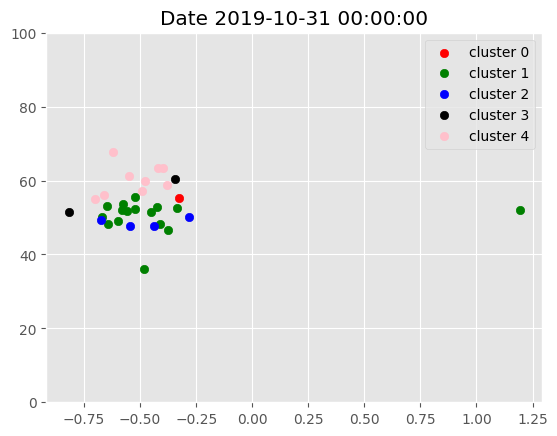

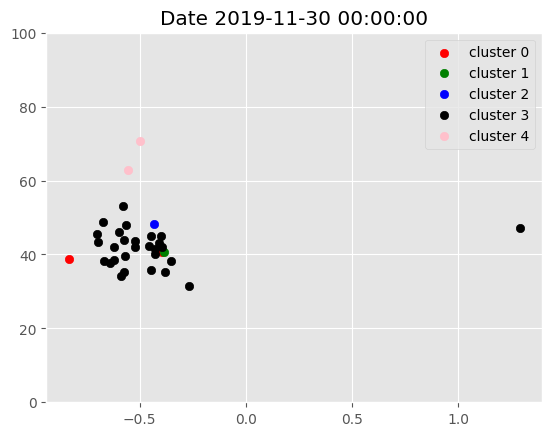

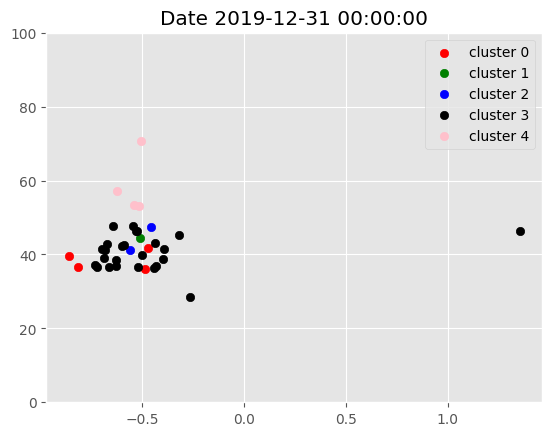

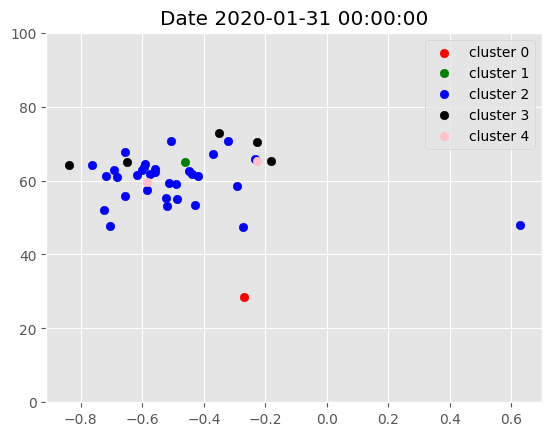

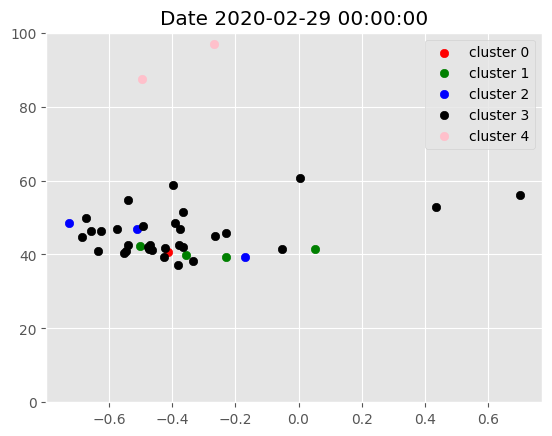

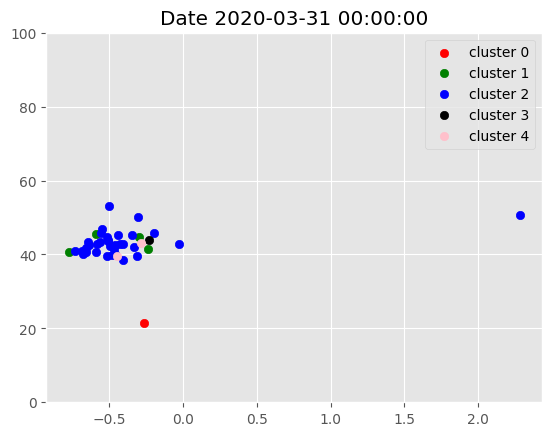

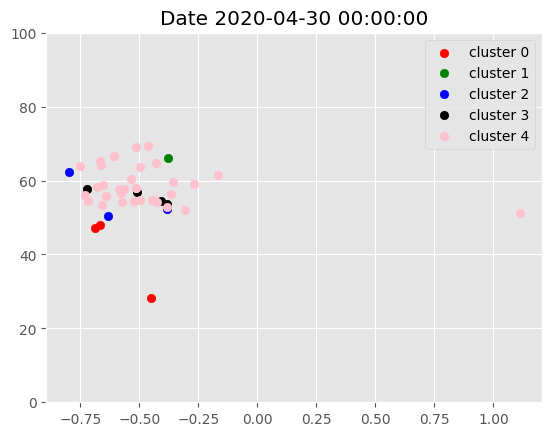

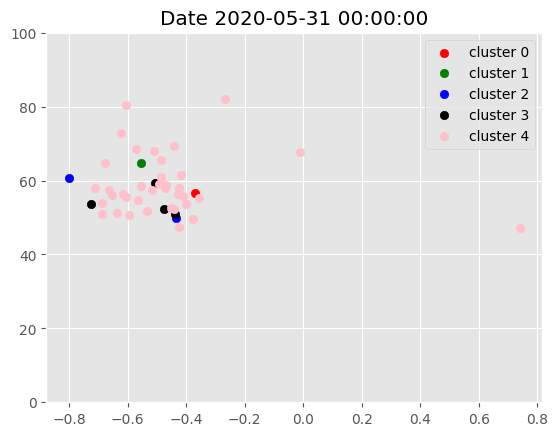

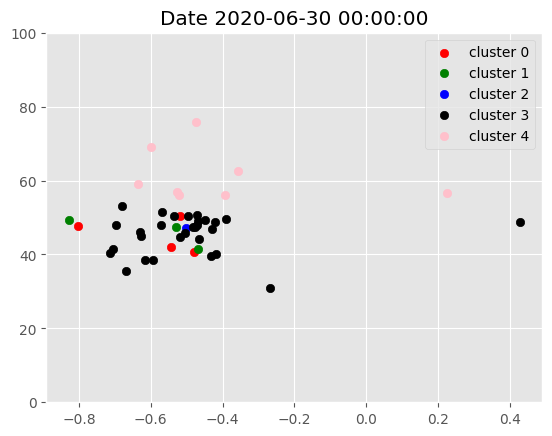

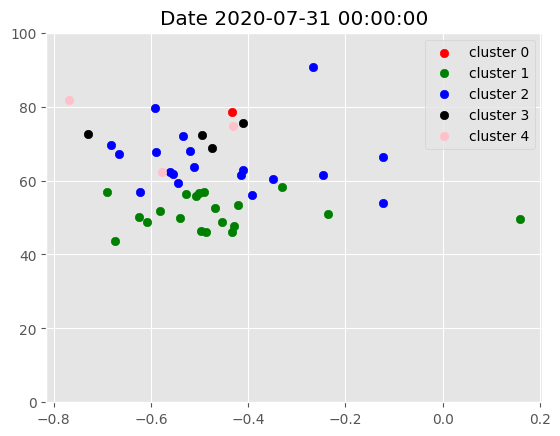

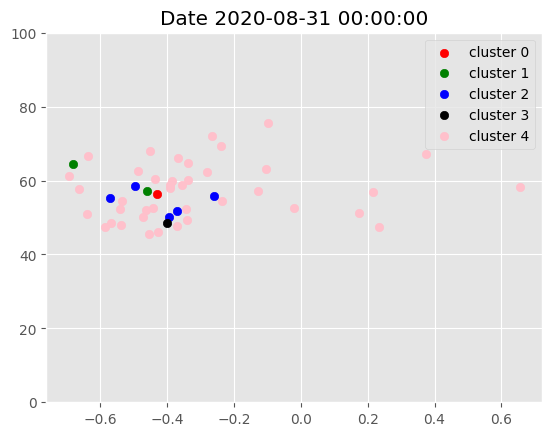

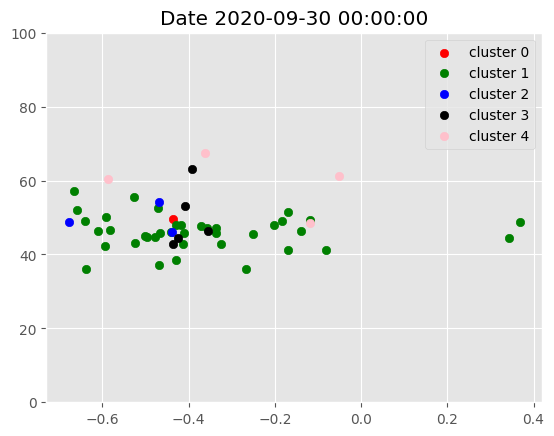

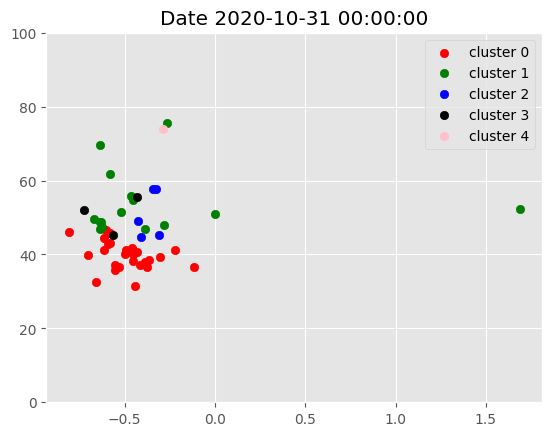

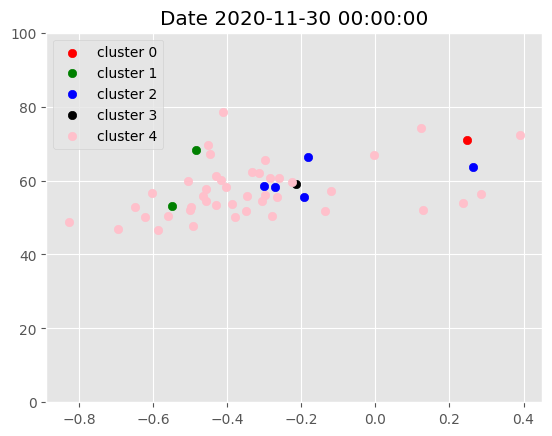

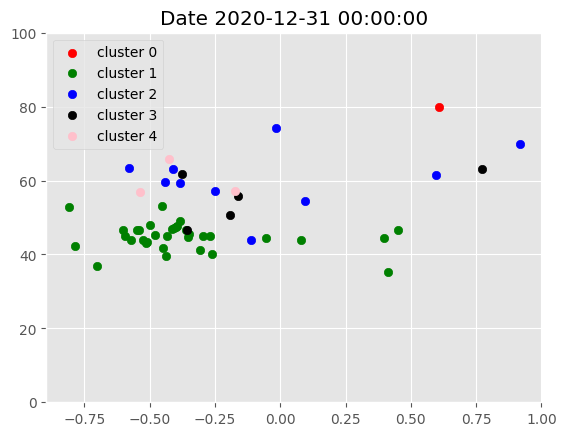

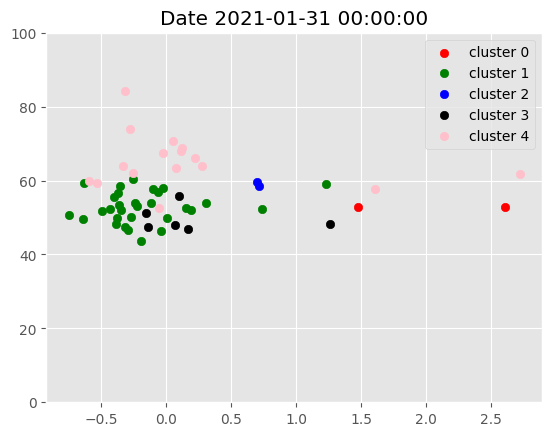

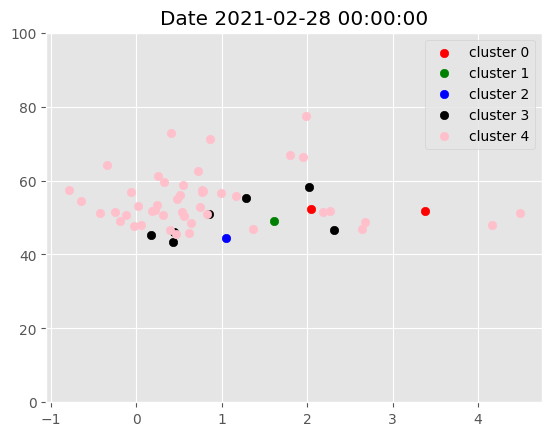

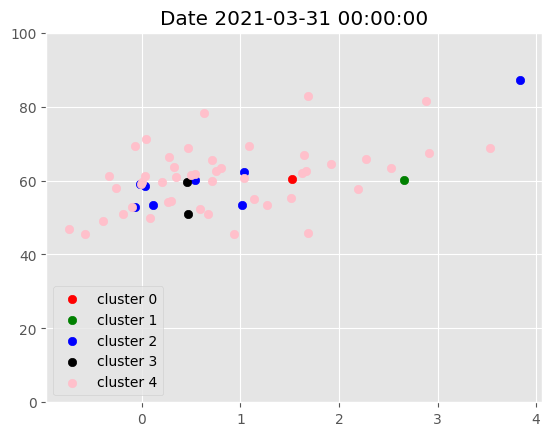

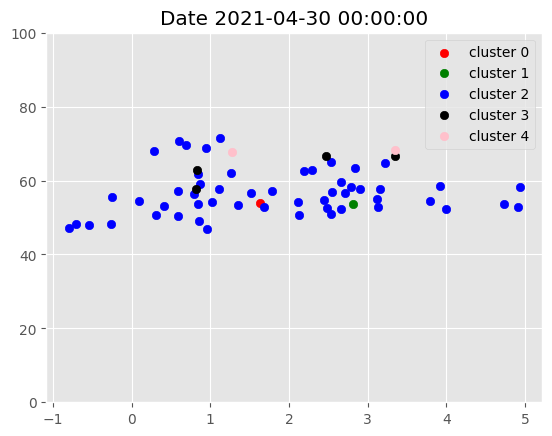

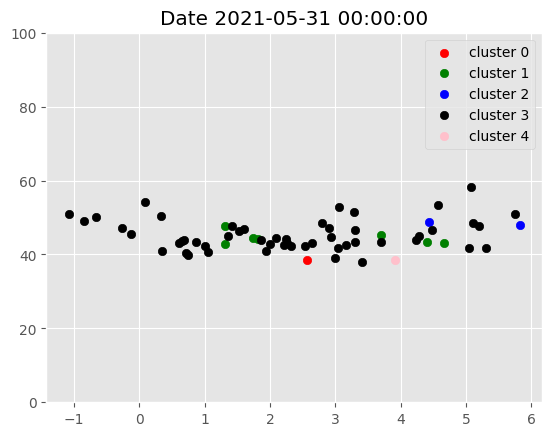

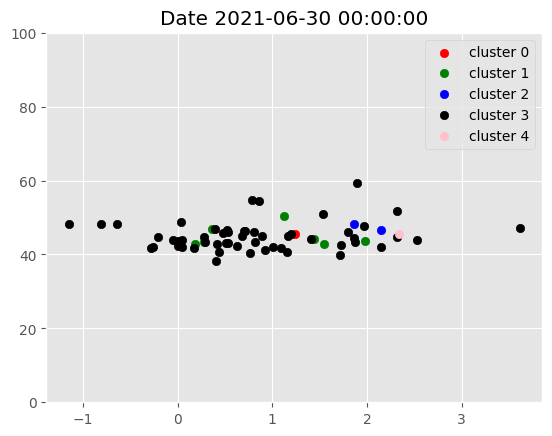

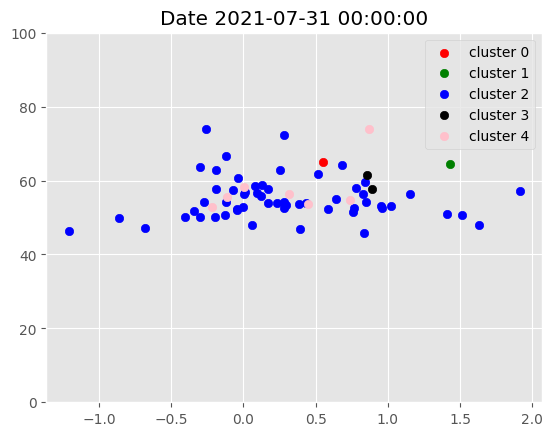

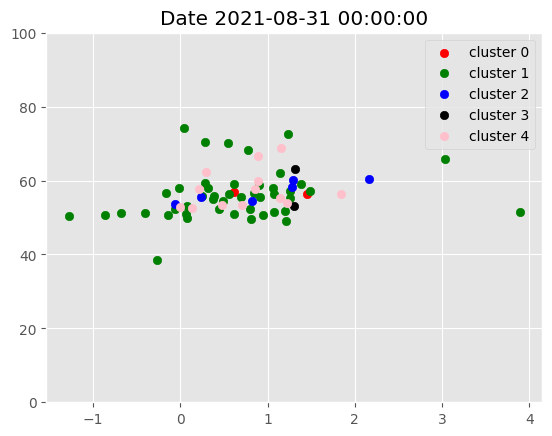

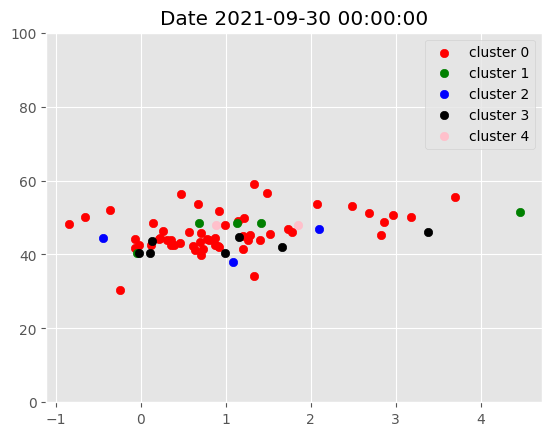

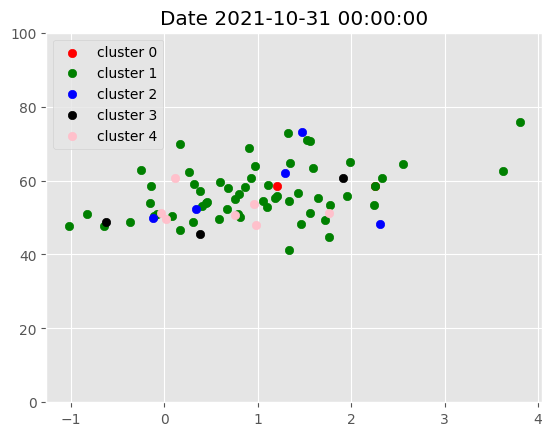

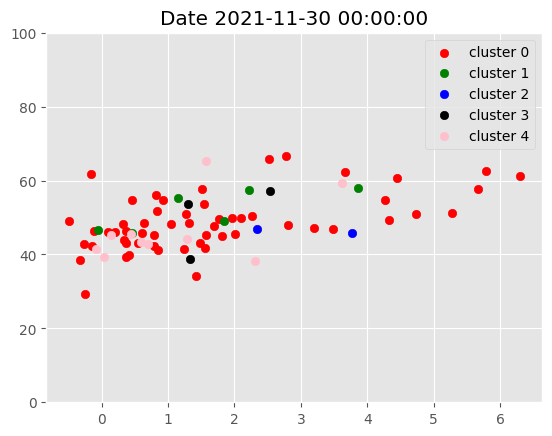

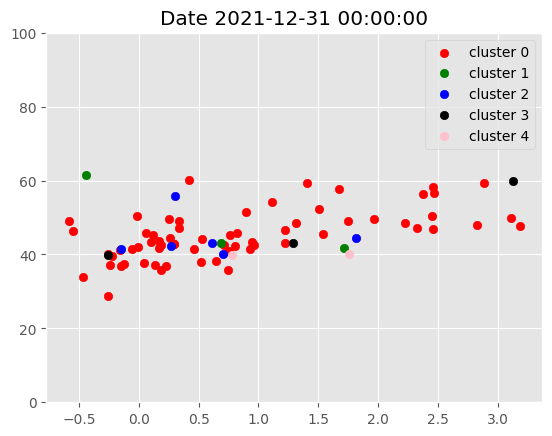

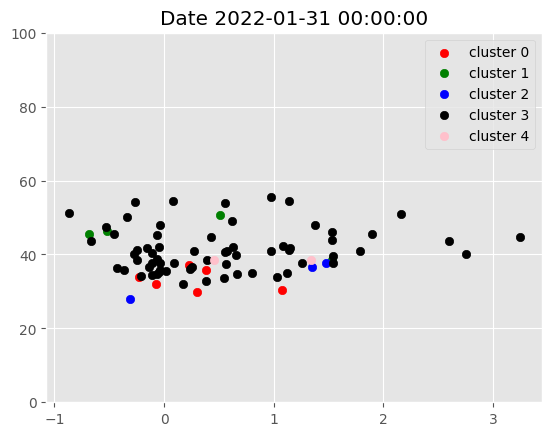

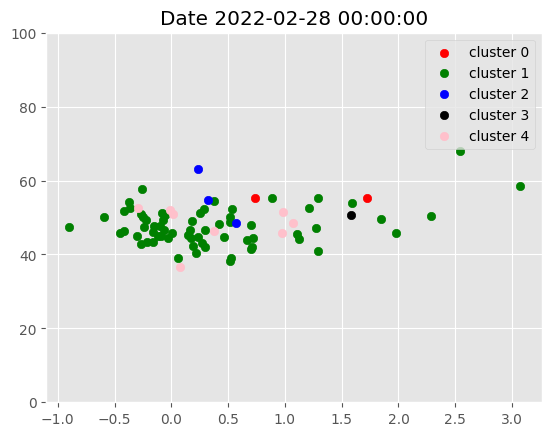

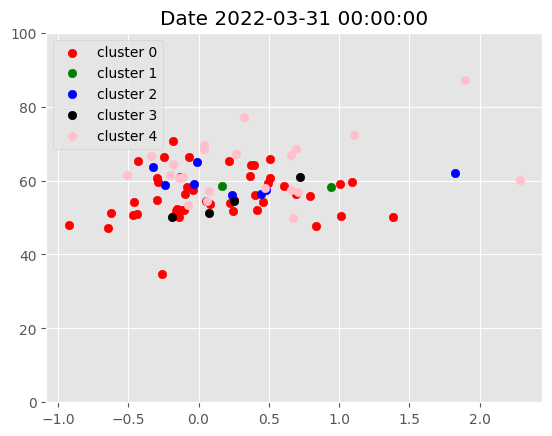

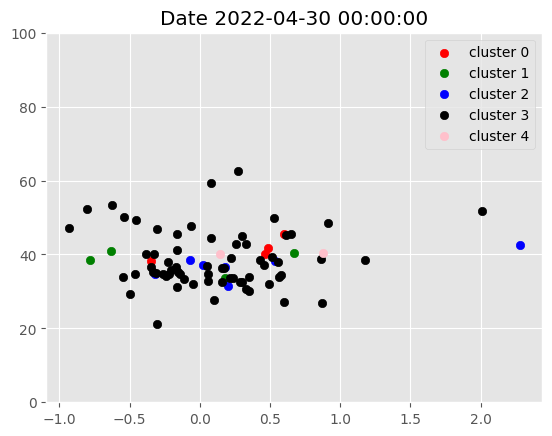

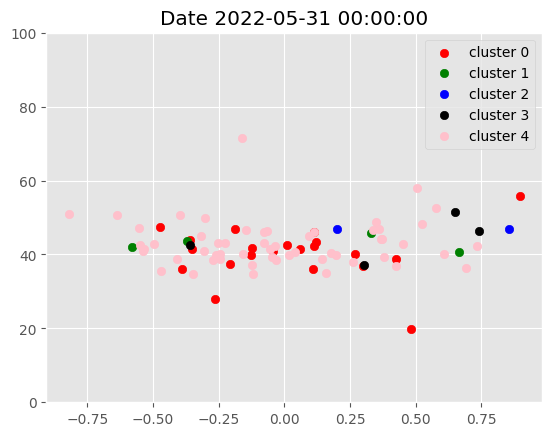

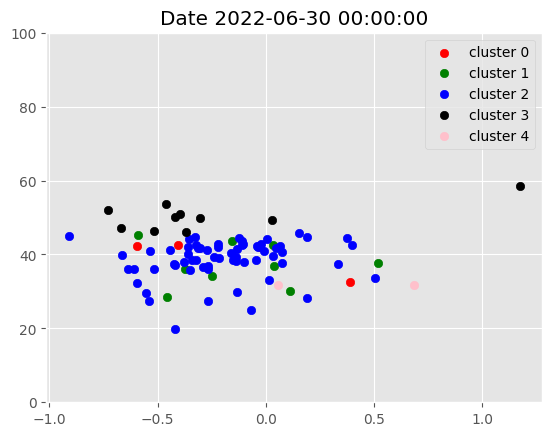

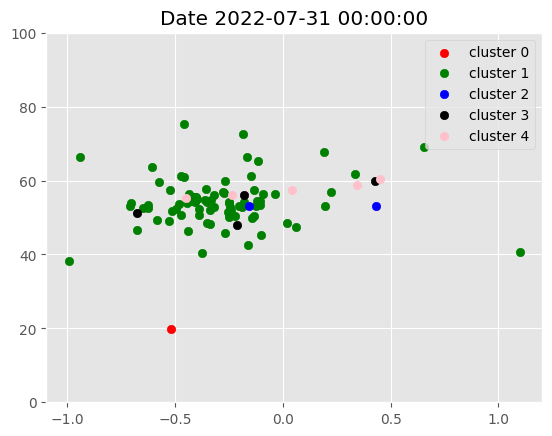

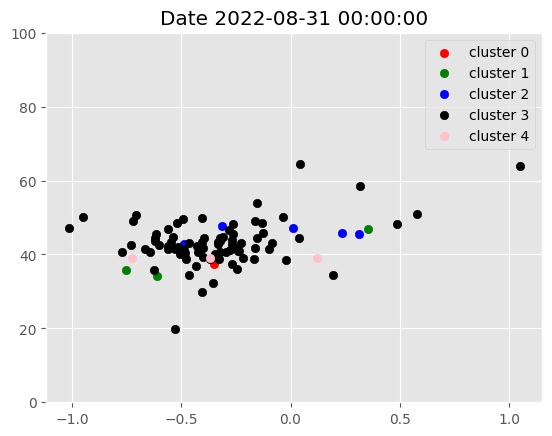

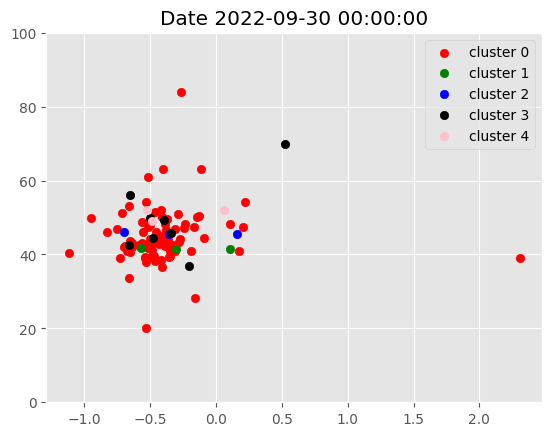

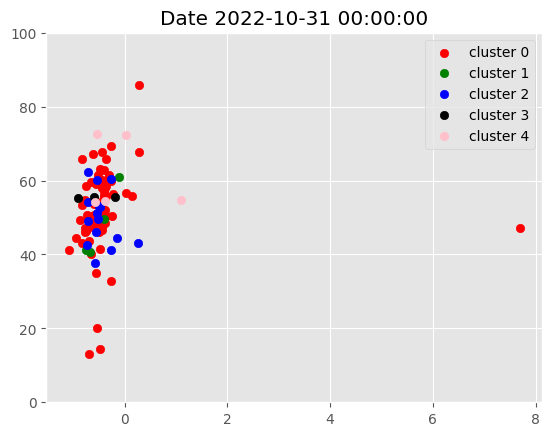

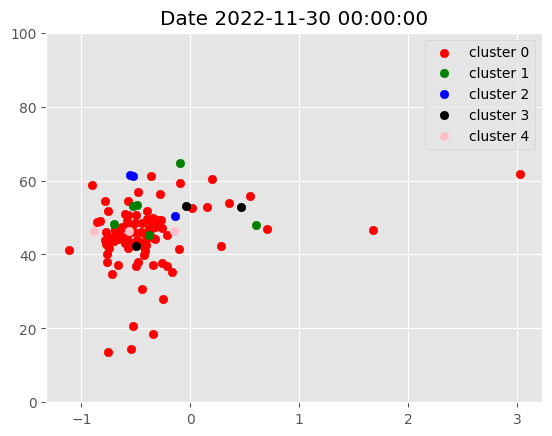

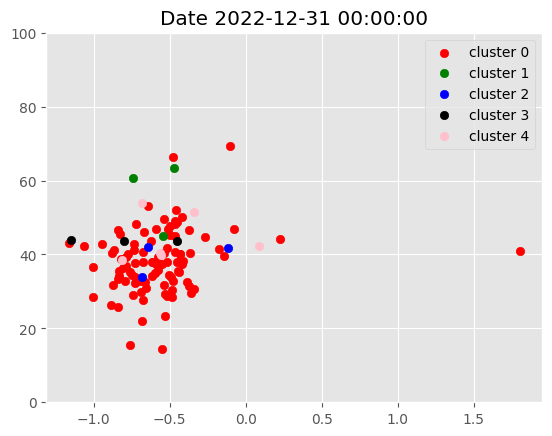

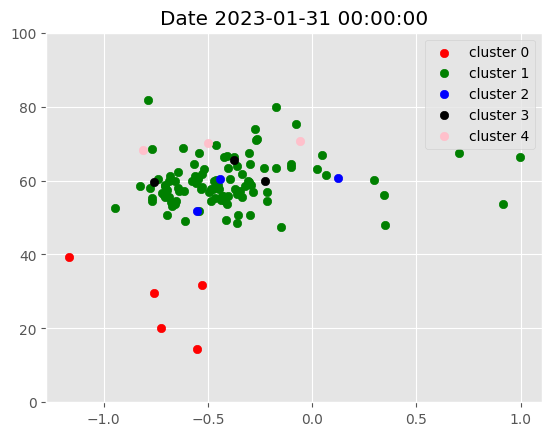

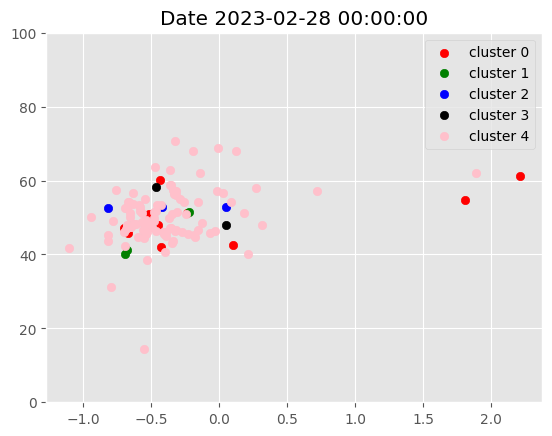

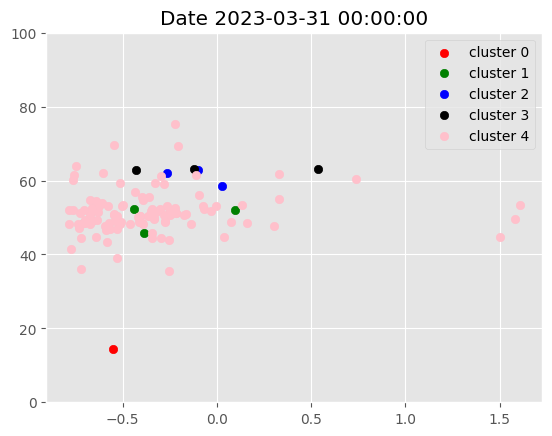

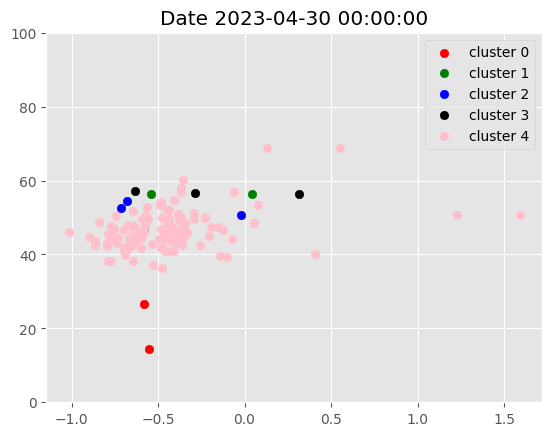

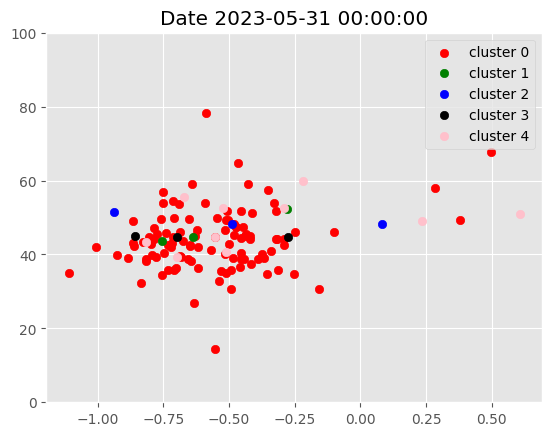

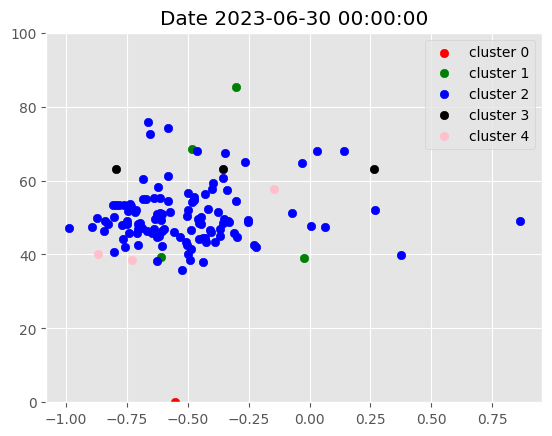

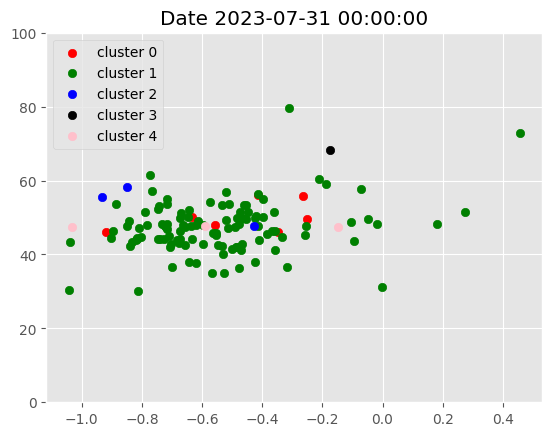

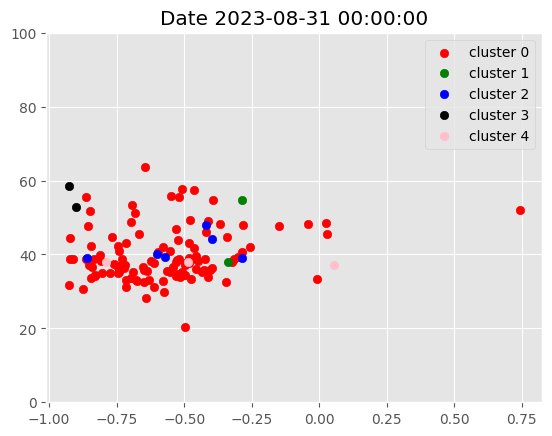

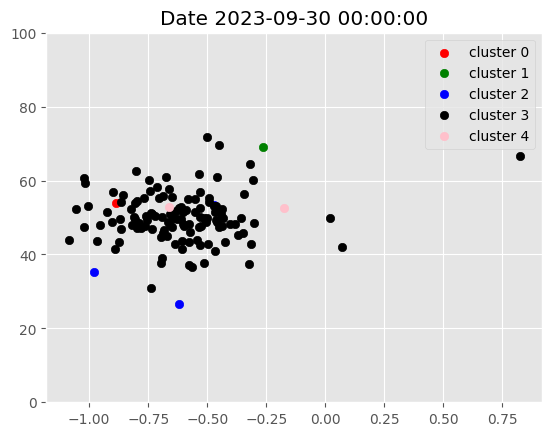

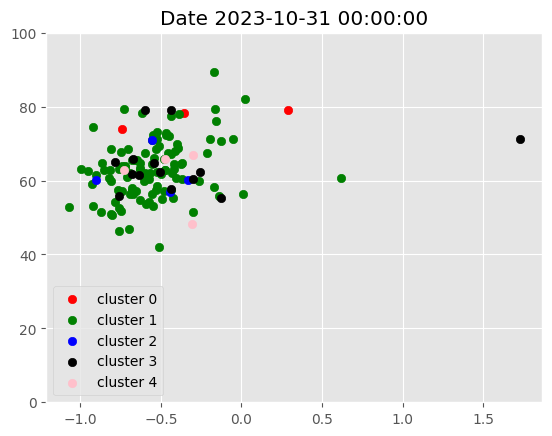

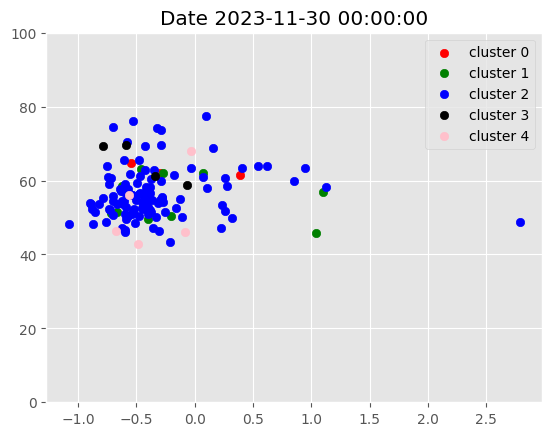

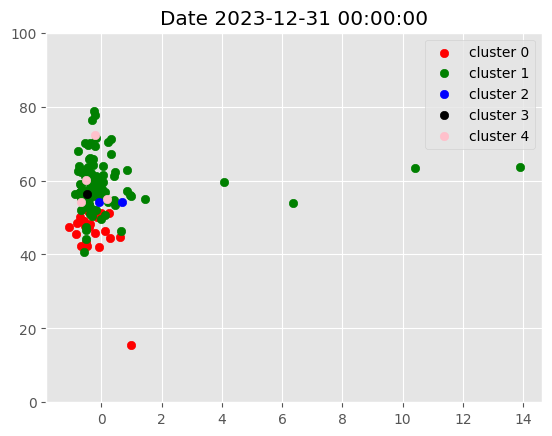

In [23]:
plt.style.use('ggplot')

for i in data.index.get_level_values('date').unique().tolist():
    
    g = data.xs(i, level=0)
    # plt.xlim(-1.25, 1.25)
    plt.ylim(0, 100)
    plt.title(f'Date {i}')
    
    plot_clusters(g)

## Using CLusters

In [24]:
# filtered_df = data[data['cluster']==4].copy()
# # 0 bad, 1 incomplete, 2 bad, 3 same as 2, 4 good
# filtered_df = filtered_df.reset_index(level=1)

# filtered_df.index = filtered_df.index+pd.DateOffset(1)

# filtered_df = filtered_df.reset_index().set_index(['date', 'ticker'])

# dates = filtered_df.index.get_level_values('date').unique().tolist()

# fixed_dates = {}

# for d in dates:
    
#     fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level=0).index.tolist()
    
# fixed_dates

In [25]:
# filtered_df

# RQA Measures Clusters

In [26]:
import pandas as pd

# Replace 'feature_df.csv' with the actual name of your CSV file
file_path = r'feature_df_2024.csv'

# Read the CSV file into a new DataFrame
new_feature_df = pd.read_csv(file_path)

# Now 'new_feature_df' contains the DataFrame you saved in the previous notebook


In [27]:
new_feature_df

,ticker,Year,Percentage of Recurrence,Trapping Time,Laminarity,Recurrence Rate,Divergence,Max Vertical Length,Entropy of Vertical Structures,Mean Recurrence Time,Recurrence Time Entropy,Num Most Probable Recurrence Time
0,BTC-USD,2014,3431.107448,106,0.009434,3.053945e-03,0.009434,9.925939e+03,37.032076,34.311074,37.032076,0
1,BTC-USD,2015,5839.122796,365,0.002740,4.382940e-04,0.002740,7.039669e+04,99.560676,58.391228,99.560676,348
2,BTC-USD,2016,15616.514410,366,0.002732,1.165803e-03,0.002732,1.491189e+05,127.607009,156.165144,127.607009,362
3,BTC-USD,2017,381443.303900,365,0.002740,2.863173e-02,0.002740,5.654349e+06,-9532.144621,3814.433039,-9532.144621,349
4,BTC-USD,2018,256302.310100,365,0.002740,1.923845e-02,0.002740,3.633466e+06,-5261.430666,2563.023101,-5261.430666,5
...,...,...,...,...,...,...,...,...,...,...,...,...
964,JST-USD,2020,1.878642,239,0.004184,3.290000e-07,0.004184,1.275647e+01,0.176278,0.018786,0.176278,97
965,JST-USD,2021,3.270497,365,0.002740,2.450000e-07,0.002740,3.877119e+01,0.301972,0.032705,0.301972,104
966,JST-USD,2022,1.706623,365,0.002740,1.280000e-07,0.002740,1.739704e+01,0.169120,0.017066,0.169120,90
967,JST-USD,2023,0.453001,365,0.002740,3.400000e-08,0.002740,4.806165e+00,0.050976,0.004530,0.050976,304


Number of instances in each cluster:
Yearly_Cluster
0    634
1    260
3     65
4      7
2      3
Name: count, dtype: int64


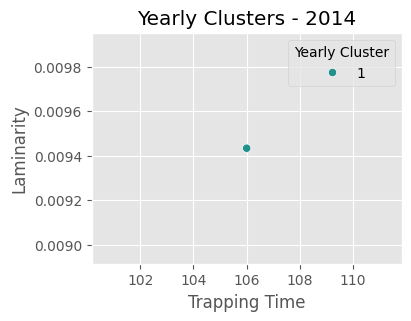

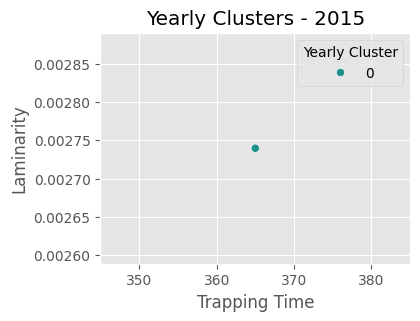

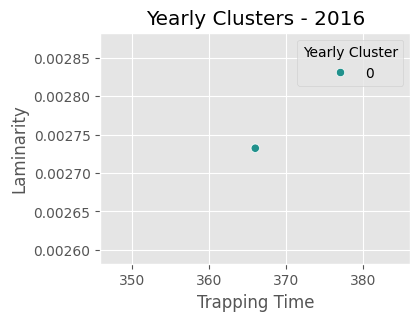

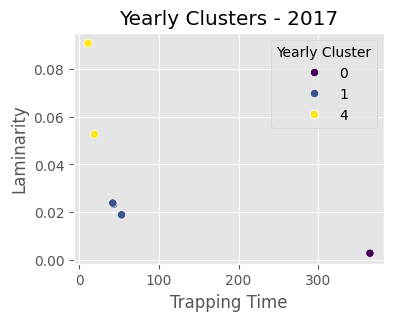

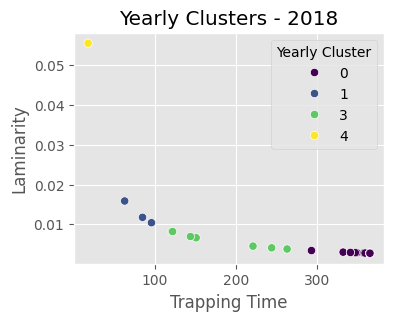

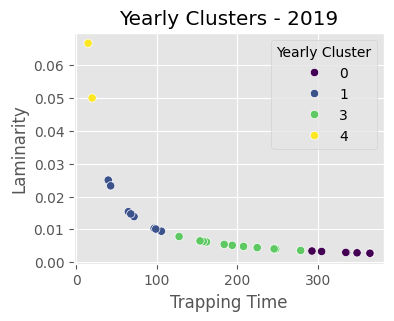

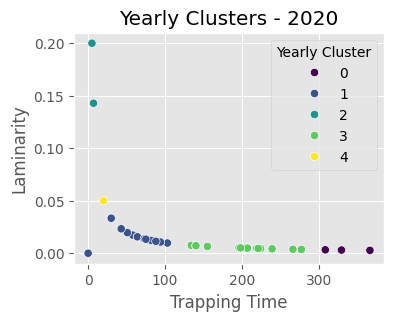

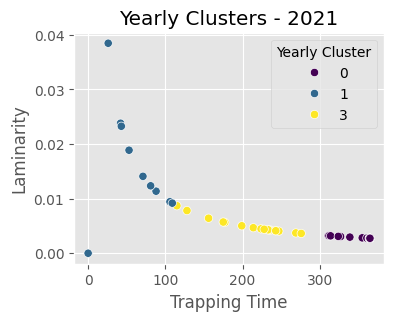

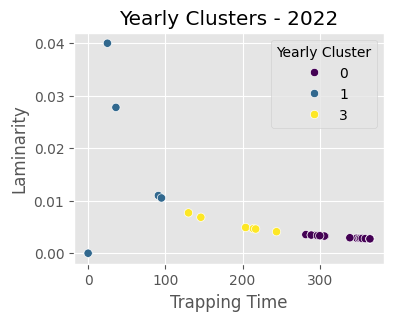

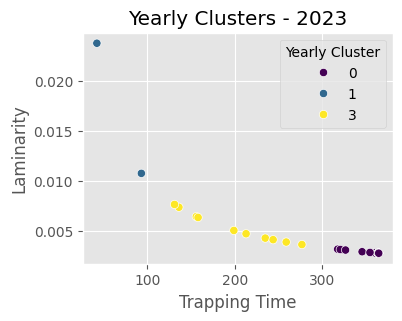

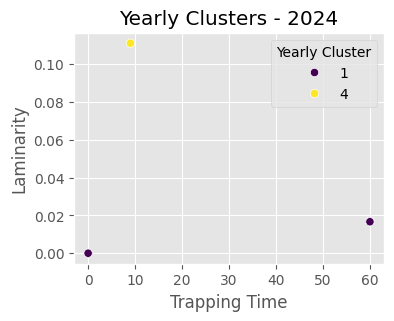

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def cluster_and_visualize(df, rqa_column_1, rqa_column_2, num_clusters=5):
    # Extract relevant columns
    X = df[[rqa_column_1, rqa_column_2]].values
    
    # Normalize the data
    scaler = StandardScaler()
    X_normalized = scaler.fit_transform(X)
    
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=num_clusters)
    df['Yearly_Cluster'] = kmeans.fit_predict(X_normalized)
    
    # Check the number of instances in each cluster
    cluster_counts = df['Yearly_Cluster'].value_counts()
    print("Number of instances in each cluster:")
    print(cluster_counts)
    
    # Visualize yearly clusters
    for year in df['Year'].unique():
        plt.figure(figsize=(4,3))
        
        # Filter DataFrame for the current year
        df_year = df[df['Year'] == year]
    
        # Scatter plot
        sns.scatterplot(x=rqa_column_1, y=rqa_column_2, hue='Yearly_Cluster', data=df_year, palette='viridis')
        
        # Title and labels
        plt.title(f'Yearly Clusters - {year}')
        plt.xlabel(rqa_column_1)
        plt.ylabel(rqa_column_2)
        
        # Optional: Add legend
        plt.legend(title='Yearly Cluster', loc='upper right')
        
        # Show the plot
        plt.show()

# Example usage:
# Replace 'new_feature_df', 'Percentage of Recurrence', and 'Recurrence Rate' with your actual DataFrame and column names
cluster_and_visualize(new_feature_df, 'Trapping Time', 'Laminarity')

In [29]:
new_feature_df

,ticker,Year,Percentage of Recurrence,Trapping Time,Laminarity,Recurrence Rate,Divergence,Max Vertical Length,Entropy of Vertical Structures,Mean Recurrence Time,Recurrence Time Entropy,Num Most Probable Recurrence Time,Yearly_Cluster
0,BTC-USD,2014,3431.107448,106,0.009434,3.053945e-03,0.009434,9.925939e+03,37.032076,34.311074,37.032076,0,1
1,BTC-USD,2015,5839.122796,365,0.002740,4.382940e-04,0.002740,7.039669e+04,99.560676,58.391228,99.560676,348,0
2,BTC-USD,2016,15616.514410,366,0.002732,1.165803e-03,0.002732,1.491189e+05,127.607009,156.165144,127.607009,362,0
3,BTC-USD,2017,381443.303900,365,0.002740,2.863173e-02,0.002740,5.654349e+06,-9532.144621,3814.433039,-9532.144621,349,0
4,BTC-USD,2018,256302.310100,365,0.002740,1.923845e-02,0.002740,3.633466e+06,-5261.430666,2563.023101,-5261.430666,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,JST-USD,2020,1.878642,239,0.004184,3.290000e-07,0.004184,1.275647e+01,0.176278,0.018786,0.176278,97,3
965,JST-USD,2021,3.270497,365,0.002740,2.450000e-07,0.002740,3.877119e+01,0.301972,0.032705,0.301972,104,0
966,JST-USD,2022,1.706623,365,0.002740,1.280000e-07,0.002740,1.739704e+01,0.169120,0.017066,0.169120,90,0
967,JST-USD,2023,0.453001,365,0.002740,3.400000e-08,0.002740,4.806165e+00,0.050976,0.004530,0.050976,304,0


In [30]:
def process_yearly_data(df, start_year, end_year):
    # Create an empty DataFrame to hold all the processed data
    all_years_df = pd.DataFrame()

    for year in range(start_year, end_year + 1):
        # Filter the DataFrame for the specific year
        filtered_df = df[df['Year'] == year].copy()

        # Interchange 'ticker' and 'Year' columns
        filtered_df = filtered_df.rename(columns={'ticker': 'Year_temp', 'Year': 'ticker'})
        filtered_df = filtered_df.rename(columns={'Year_temp': 'Year'})

        # Reset the column order to place 'ticker' in the original 'Year' position and vice-versa
        cols = filtered_df.columns.tolist()
        symbol_index = cols.index('ticker')
        year_index = cols.index('Year')
        cols[symbol_index], cols[year_index] = cols[year_index], cols[symbol_index]
        filtered_df = filtered_df[cols]

        # Interchange 'ticker' and 'Year' column headers
        filtered_df.columns = ['Year' if col == 'ticker' else 'ticker' if col == 'Year' else col for col in filtered_df.columns]

        # Create a DataFrame with a date range for each year on a monthly interval
        date_ranges = pd.date_range(start=f"{year}-01-01", end=f"{year}-12-31", freq='MS').to_frame(index=False, name='date')

        # Merge the date_ranges DataFrame with the original DataFrame
        # This will replicate the rows for each month in the year
        filtered_df_expanded = pd.merge(filtered_df, date_ranges, how='cross')

        # Now we can drop the unnecessary 'Year' column since 'Date' provides the same information
        filtered_df_expanded = filtered_df_expanded.drop('Year', axis=1)

        # Append the processed DataFrame to the all_years_df
        all_years_df = pd.concat([all_years_df, filtered_df_expanded], ignore_index=True)

    return all_years_df

# Apply the function to the original DataFrame for years 2014 to 2023
final_transformed_df = process_yearly_data(new_feature_df, 2014, 2023)

# final_transformed_df now contains the processed data for all years (2014 to 2023)

In [31]:
# Get the list of current column names
cols = final_transformed_df.columns.tolist()

# Move the last column to the first position
cols = [cols[-1]] + cols[:-1]

# Reorder the DataFrame with the new column order
final_transformed_df = final_transformed_df[cols]

# Verify the column order
print(final_transformed_df.columns)

Index(['date', 'ticker', 'Percentage of Recurrence', 'Trapping Time',
       'Laminarity', 'Recurrence Rate', 'Divergence', 'Max Vertical Length',
       'Entropy of Vertical Structures', 'Mean Recurrence Time',
       'Recurrence Time Entropy', 'Num Most Probable Recurrence Time',
       'Yearly_Cluster'],
      dtype='object')


In [32]:
final_transformed_df

,date,ticker,Percentage of Recurrence,Trapping Time,Laminarity,Recurrence Rate,Divergence,Max Vertical Length,Entropy of Vertical Structures,Mean Recurrence Time,Recurrence Time Entropy,Num Most Probable Recurrence Time,Yearly_Cluster
0,2014-01-01,BTC-USD,3431.107448,106,0.009434,3.053945e-03,0.009434,9925.938599,37.032076,34.311074,37.032076,0,1
1,2014-02-01,BTC-USD,3431.107448,106,0.009434,3.053945e-03,0.009434,9925.938599,37.032076,34.311074,37.032076,0,1
2,2014-03-01,BTC-USD,3431.107448,106,0.009434,3.053945e-03,0.009434,9925.938599,37.032076,34.311074,37.032076,0,1
3,2014-04-01,BTC-USD,3431.107448,106,0.009434,3.053945e-03,0.009434,9925.938599,37.032076,34.311074,37.032076,0,1
4,2014-05-01,BTC-USD,3431.107448,106,0.009434,3.053945e-03,0.009434,9925.938599,37.032076,34.311074,37.032076,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9463,2023-08-01,JST-USD,0.453001,365,0.002740,3.400000e-08,0.002740,4.806165,0.050976,0.004530,0.050976,304,0
9464,2023-09-01,JST-USD,0.453001,365,0.002740,3.400000e-08,0.002740,4.806165,0.050976,0.004530,0.050976,304,0
9465,2023-10-01,JST-USD,0.453001,365,0.002740,3.400000e-08,0.002740,4.806165,0.050976,0.004530,0.050976,304,0
9466,2023-11-01,JST-USD,0.453001,365,0.002740,3.400000e-08,0.002740,4.806165,0.050976,0.004530,0.050976,304,0


In [33]:
# Assuming 'ticker' and 'cluster' are already columns in final_transformed_df
# We're going to set a MultiIndex with 'Date' and 'ticker' and keep the attributes as columns
transformed_df = final_transformed_df.set_index(['date', 'ticker'])

# Make sure to sort the MultiIndex for efficient querying and slicing
transformed_df.sort_index(inplace=True)

# Display the transformed DataFrame
transformed_df

Percentage of Recurrence  Trapping Time  Laminarity  \
date       ticker                                                         
2014-01-01 BTC-USD               3431.107448            106    0.009434   
           LTC-USD                 52.951512            106    0.009434   
2014-02-01 BTC-USD               3431.107448            106    0.009434   
           LTC-USD                 52.951512            106    0.009434   
2014-03-01 BTC-USD               3431.107448            106    0.009434   
...                                      ...            ...         ...   
2023-12-01 XRP-USD                 11.338238            365    0.002740   
           XTZ-USD                 19.468254            365    0.002740   
           ZEC-USD                747.426671            365    0.002740   
           ZIL-USD                  0.564472            365    0.002740   
           ZRX-USD                  7.498926            365    0.002740   

                    Recurrence Rate  Divergence  Max Vertical Length  \
date       ticker                                                      
2014-01-01 BTC-USD     3.053945e-03    0.009434          9925.938599   
           LTC-USD     4.710000e-05    0.009434           143.860827   
2014-02-01 BTC-USD     3.053945e-03    0.009434          9925.938599   
           LTC-USD     4.710000e-05    0.009434           143.860827   
2014-03-01 BTC-USD     3.053945e-03    0.009434          9925.938599   
...                             ...         ...                  ...   
2023-12-01 XRP-USD     8.510000e-07    0.002740           112.391739   
           XTZ-USD     1.460000e-06    0.002740           197.603084   
           ZEC-USD     5.610000e-05    0.002740          6240.264189   
           ZIL-USD     4.240000e-08    0.002740             4.553314   
           ZRX-USD     5.630000e-07    0.002740           100.919709   

                    Entropy of Vertical Structures  Mean Recurrence Time  \
date       ticker                                                          
2014-01-01 BTC-USD                       37.032076             34.311074   
           LTC-USD                        2.761083              0.529515   
2014-02-01 BTC-USD                       37.032076             34.311074   
           LTC-USD                        2.761083              0.529515   
2014-03-01 BTC-USD                       37.032076             34.311074   
...                                            ...                   ...   
2023-12-01 XRP-USD                        0.909660              0.113382   
           XTZ-USD                        1.460443              0.194683   
           ZEC-USD                       28.685976              7.474267   
           ZIL-USD                        0.062329              0.005645   
           ZRX-USD                        0.628501              0.074989   

                    Recurrence Time Entropy  \
date       ticker                             
2014-01-01 BTC-USD                37.032076   
           LTC-USD                 2.761083   
2014-02-01 BTC-USD                37.032076   
           LTC-USD                 2.761083   
2014-03-01 BTC-USD                37.032076   
...                                     ...   
2023-12-01 XRP-USD                 0.909660   
           XTZ-USD                 1.460443   
           ZEC-USD                28.685976   
           ZIL-USD                 0.062329   
           ZRX-USD                 0.628501   

                    Num Most Probable Recurrence Time  Yearly_Cluster  
date       ticker                                                      
2014-01-01 BTC-USD                                  0               1  
           LTC-USD                                  0               1  
2014-02-01 BTC-USD                                  0               1  
           LTC-USD                                  0               1  
2014-03-01 BTC-USD                                  0               1  
..

In [34]:
transformed_df = transformed_df[transformed_df.index.get_level_values('date') >= pd.Timestamp('2019-09-30')]
transformed_df

Percentage of Recurrence  Trapping Time  Laminarity  \
date       ticker                                                          
2019-10-01 ADA-USD                   2.008555            365    0.002740   
           AGIX-USD                  1.377091            365    0.002740   
           ALGO-USD                 36.209799            194    0.005155   
           ARB-USD                   0.020662            365    0.002740   
           ATOM-USD                127.260630            293    0.003413   
...                                       ...            ...         ...   
2023-12-01 XRP-USD                  11.338238            365    0.002740   
           XTZ-USD                  19.468254            365    0.002740   
           ZEC-USD                 747.426671            365    0.002740   
           ZIL-USD                   0.564472            365    0.002740   
           ZRX-USD                   7.498926            365    0.002740   

                     Recurrence Rate  Divergence  Max Vertical Length  \
date       ticker                                                       
2019-10-01 ADA-USD      1.510000e-07    0.002740            15.410422   
           AGIX-USD     1.030000e-07    0.002740             9.425203   
           ALGO-USD     9.620000e-06    0.005155           526.008075   
           ARB-USD      1.550000e-09    0.002740             0.236311   
           ATOM-USD     1.480000e-05    0.003413          1030.304859   
...                              ...         ...                  ...   
2023-12-01 XRP-USD      8.510000e-07    0.002740           112.391739   
           XTZ-USD      1.460000e-06    0.002740           197.603084   
           ZEC-USD      5.610000e-05    0.002740          6240.264189   
           ZIL-USD      4.240000e-08    0.002740             4.553314   
           ZRX-USD      5.630000e-07    0.002740           100.919709   

                     Entropy of Vertical Structures  Mean Recurrence Time  \
date       ticker                                                           
2019-10-01 ADA-USD                         0.195942              0.020086   
           AGIX-USD                        0.140033              0.013771   
           ALGO-USD                        2.216196              0.362098   
           ARB-USD                         0.002965              0.000207   
           ATOM-USD                        6.834637              1.272606   
...                                             ...                   ...   
2023-12-01 XRP-USD                         0.909660              0.113382   
           XTZ-USD                         1.460443              0.194683   
           ZEC-USD                        28.685976              7.474267   
           ZIL-USD                         0.062329              0.005645   
           ZRX-USD                         0.628501              0.074989   

                     Recurrence Time Entropy  \
date       ticker                              
2019-10-01 ADA-USD                  0.195942   
           AGIX-USD                 0.140033   
           ALGO-USD                 2.216196   
           ARB-USD                  0.002965   
           ATOM-USD                 6.834637   
...                                      ...   
2023-12-01 XRP-USD                  0.909660   
           XTZ-USD                  1.460443   
           ZEC-USD                 28.685976   
           ZIL-USD                  0.062329   
           ZRX-USD                  0.628501   

                     Num Most Probable Recurrence Time  Yearly_Cluster  
date       ticker                                                       
2019-10-01 ADA-USD                                 174               0  
           AGIX-USD                                149               0  
           ALGO-USD                                  0               3  
           ARB-USD                                 175               0  
           ATOM-U

In [35]:
# Initialize a dictionary to store the fixed_dates for each cluster
clusters_fixed_dates = {}

# Loop through clusters 0 to 4
for cluster_num in range(5):
    # Filter the DataFrame for rows where the 'cluster' column equals the current cluster number
    filtered_df = transformed_df[transformed_df['Yearly_Cluster'] == cluster_num].copy()

    # Reset the index to separate the 'Date' from the MultiIndex for manipulation
    filtered_df = filtered_df.reset_index()

    # Adjust the 'Date' using pd.DateOffset by adding 1 day
    filtered_df['date'] = filtered_df['date'] + pd.DateOffset(1)

    # Resetting index again and setting new index with 'Date' and 'ticker' (or 'ticker')
    filtered_df = filtered_df.set_index(['date', 'ticker'])

    # Get unique dates for this cluster's data
    dates = filtered_df.index.get_level_values('date').unique().tolist()

    # Initialize the dictionary for the current cluster
    fixed_dates = {}

    # Loop through the dates to create the mapping for the current cluster
    for d in dates:
        # Using strftime to format date as a string
        formatted_date = d.strftime('%Y-%m-%d')

        # Extract the list of symbols ('ticker') for the given date
        fixed_dates[formatted_date] = filtered_df.xs(d, level=0).index.tolist()

    # Store the result in the main dictionary using the current cluster number as the key
    clusters_fixed_dates[cluster_num] = fixed_dates

# View the result
for cluster_num, fixed_dates in clusters_fixed_dates.items():
    print(f"Cluster {cluster_num}:")
    print(fixed_dates)

Cluster 0:
{'2019-10-02': ['ADA-USD', 'AGIX-USD', 'ARB-USD', 'ATOM-USD', 'BAT-USD', 'BCH-USD', 'BEAM-USD', 'BNB-USD', 'BTC-USD', 'BTG-USD', 'BTT-USD', 'CRO-USD', 'DASH-USD', 'DOGE-USD', 'ELF-USD', 'ENJ-USD', 'EOS-USD', 'ETC-USD', 'ETH-USD', 'FET-USD', 'FIL-USD', 'FTM-USD', 'GAS-USD', 'GNO-USD', 'HOT2682-USD', 'HT-USD', 'IOTX-USD', 'JUP-USD', 'KCS-USD', 'LINK-USD', 'LRC-USD', 'LTC-USD', 'MANA-USD', 'MKR-USD', 'NEO-USD', 'NEXO-USD', 'QNT-USD', 'QTUM-USD', 'RPL-USD', 'SC-USD', 'SNX-USD', 'THETA-USD', 'TRAC-USD', 'TRX-USD', 'USDC-USD', 'USDP-USD', 'USDT-USD', 'VET-USD', 'WBTC-USD', 'XDC-USD', 'XEM-USD', 'XLM-USD', 'XMR-USD', 'XRP-USD', 'XTZ-USD', 'ZEC-USD', 'ZIL-USD', 'ZRX-USD'], '2019-11-02': ['ADA-USD', 'AGIX-USD', 'ARB-USD', 'ATOM-USD', 'BAT-USD', 'BCH-USD', 'BEAM-USD', 'BNB-USD', 'BTC-USD', 'BTG-USD', 'BTT-USD', 'CRO-USD', 'DASH-USD', 'DOGE-USD', 'ELF-USD', 'ENJ-USD', 'EOS-USD', 'ETC-USD', 'ETH-USD', 'FET-USD', 'FIL-USD', 'FTM-USD', 'GAS-USD', 'GNO-USD', 'HOT2682-USD', 'HT-USD', 'IOTX-

### mix of clusters

In [36]:
import pandas as pd
# THIS WORKS PROPERLY + COmination of CLuster 4, 2 and ratio of 0.7:0.3 also good. keeps us in net positive throughout
# Assuming 'data' is your original DataFrame
filtered_df_Indiclusters = data.copy()
# Assuming 'transformed_df' is your preprocessed and transformed DataFrame
# Filtering out rows based on clusters 'X' and 'Y' (0 and 4 in your case)
cluster_X_rows = filtered_df_Indiclusters[filtered_df_Indiclusters['cluster'] == 4]
cluster_Y_rows = transformed_df[transformed_df['Yearly_Cluster'] == 2]

# Setting the ratio of rows to be taken from each cluster
cluster_X_ratio = 0.7  # Adjust this ratio as needed
cluster_Y_ratio = 1 - cluster_X_ratio

# Calculating the number of rows to be taken from each cluster
num_cluster_X = int(len(cluster_X_rows) * cluster_X_ratio)
num_cluster_Y = int(len(cluster_Y_rows) * cluster_Y_ratio)

# Sample the rows from each cluster according to the specified ratios
cluster_X_rows = cluster_X_rows.sample(n=num_cluster_X)
cluster_Y_rows = cluster_Y_rows.sample(n=num_cluster_Y)

# Concatenating the selected rows from each cluster
filtered_df = pd.concat([cluster_X_rows, cluster_Y_rows])

# Sorting based on the MultiIndex to maintain order by date and ticker
filtered_df = filtered_df.sort_index()

# Resetting the MultiIndex to adjust dates
filtered_df = filtered_df.reset_index()
filtered_df['date'] = filtered_df['date'] + pd.DateOffset(1)

# Set 'Date' and 'ticker' (or 'ticker') as the new index
filtered_df = filtered_df.set_index(['date', 'ticker'])

# Extract unique dates to create the fixed_dates structure
dates = filtered_df.index.get_level_values('date').unique()
fixed_dates = {d.strftime('%Y-%m-%d'): filtered_df.xs(d, level='date').index.get_level_values('ticker').tolist() for d in dates}

# fixed_dates now contains the dates and tickers after adjustments
# Note: We used a dictionary comprehension to simplify the process of creating fixed_dates

In [37]:
fixed_dates

{'2019-11-01': ['BAT-USD',
  'BNB-USD',
  'GAS-USD',
  'GNO-USD',
  'LINK-USD',
  'NEO-USD'],
 '2019-12-01': ['JUP-USD', 'XTZ-USD'],
 '2020-01-01': ['ETC-USD', 'MANA-USD'],
 '2020-01-02': ['1INCH-USD'],
 '2020-02-01': ['MKR-USD'],
 '2020-03-01': ['ARB-USD'],
 '2020-03-02': ['FXS-USD'],
 '2020-04-01': ['MKR-USD'],
 '2020-05-01': ['ADA-USD',
  'AGIX-USD',
  'ARB-USD',
  'BAT-USD',
  'BNB-USD',
  'BTG-USD',
  'DOGE-USD',
  'ELF-USD',
  'ENJ-USD',
  'ETC-USD',
  'FIL-USD',
  'HT-USD',
  'LINK-USD',
  'MANA-USD',
  'SC-USD',
  'SNX-USD',
  'THETA-USD',
  'TRAC-USD',
  'TRX-USD',
  'USDT-USD',
  'XDC-USD',
  'XLM-USD',
  'ZIL-USD',
  'ZRX-USD'],
 '2020-05-02': ['FRAX-USD', 'FXS-USD'],
 '2020-06-01': ['ARB-USD',
  'BAT-USD',
  'BNB-USD',
  'BTG-USD',
  'DOGE-USD',
  'ELF-USD',
  'ENJ-USD',
  'ETC-USD',
  'FIL-USD',
  'GNO-USD',
  'IOTX-USD',
  'JUP-USD',
  'KCS-USD',
  'LINK-USD',
  'LRC-USD',
  'MANA-USD',
  'NEO-USD',
  'NEXO-USD',
  'QTUM-USD',
  'SC-USD',
  'SNX-USD',
  'THETA-USD',
  'TR

In [38]:
## ORIGINAL
# import pandas as pd

# # Assuming 'data' is your original DataFrame
# filtered_df = data.copy()

# # Selecting rows with cluster 0 and cluster 4
# cluster_X_rows = filtered_df[filtered_df['cluster'] == 1]
# cluster_Y_rows = filtered_df[filtered_df['cluster'] == 0]

# # Setting the ratio of rows to be taken from each cluster
# cluster_0_ratio = 0.7  # Adjust this ratio as needed
# cluster_4_ratio = 1 - cluster_0_ratio

# # Calculating the number of rows to be taken from each cluster
# num_cluster_0 = int(len(cluster_X_rows) * cluster_0_ratio)
# num_cluster_4 = int(len(cluster_Y_rows) * cluster_4_ratio)

# # Ensuring equal number of rows for cluster 0 and cluster 4
# cluster_X_rows = cluster_X_rows.sample(n=num_cluster_0)
# cluster_Y_rows = cluster_Y_rows.sample(n=num_cluster_4)

# # Concatenating the selected rows
# filtered_df = pd.concat([cluster_X_rows, cluster_Y_rows])

# # Sorting based on the original index to maintain the order
# filtered_df = filtered_df.sort_index()

# # Resetting index and making date adjustments
# filtered_df = filtered_df.reset_index(level=1)
# filtered_df.index = filtered_df.index + pd.DateOffset(1)
# filtered_df = filtered_df.reset_index().set_index(['date', 'ticker'])

# # Getting unique dates and fixing the dates
# dates = filtered_df.index.get_level_values('date').unique().tolist()
# fixed_dates = {}

# for d in dates:
#     fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level=0).index.tolist()

# fixed_dates


In [39]:
# cluster_X_rows

In [40]:
# cluster_Y_rows

In [41]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

def optimize_weights(prices, lower_bound=0):
    
    returns = expected_returns.mean_historical_return(prices=prices,
                                                      frequency=365)
    
    cov = risk_models.sample_cov(prices=prices,
                                 frequency=365)
    
    ef = EfficientFrontier(expected_returns=returns,
                           cov_matrix=cov,
                           weight_bounds=(lower_bound, .1),
                           solver='SCS')
    
    weights = ef.max_sharpe()
    
    return ef.clean_weights()

In [42]:
stocks = data.index.get_level_values('ticker').unique().tolist()

new_df = yf.download(tickers=stocks,
                     start=data.index.get_level_values('date').unique()[0]-pd.DateOffset(months=12),
                     end=data.index.get_level_values('date').unique()[-1])

new_df

[*********************100%%**********************]  140 of 140 completed


Adj Close                                                      \
           1INCH-USD    AAVE-USD   ADA-USD  AGIX-USD   AKT-USD  ALGO-USD   
Date                                                                       
2018-10-31       NaN         NaN  0.069705  0.058127       NaN       NaN   
2018-11-01       NaN         NaN  0.070867  0.061931       NaN       NaN   
2018-11-02       NaN         NaN  0.072584  0.061861       NaN       NaN   
2018-11-03       NaN         NaN  0.071479  0.064545       NaN       NaN   
2018-11-04       NaN         NaN  0.076229  0.072555       NaN       NaN   
...              ...         ...       ...       ...       ...       ...   
2023-12-26  0.457421  102.896698  0.608799  0.354430  2.347586  0.234494   
2023-12-27  0.447588  112.113907  0.633535  0.343186  2.486422  0.229226   
2023-12-28  0.428446  118.968285  0.617422  0.325820  2.368451  0.234213   
2023-12-29  0.431516  112.426804  0.608494  0.324270  2.329964  0.226423   
2023-12-30  0.420116  111.361038  0.601964  0.326449  2.275629  0.221767   

                                                      ...    Volume           \
            API3-USD     AR-USD   ARB-USD   ATOM-USD  ...   XDC-USD  XEM-USD   
Date                                                  ...                      
2018-10-31       NaN        NaN  0.001383        NaN  ...    499180  5823560   
2018-11-01       NaN        NaN  0.001392        NaN  ...    536486  5694120   
2018-11-02       NaN        NaN  0.001722        NaN  ...    549941  6452350   
2018-11-03       NaN        NaN  0.001913        NaN  ...    494933  5212130   
2018-11-04       NaN        NaN  0.001866        NaN  ...    311929  6239750   
...              ...        ...       ...        ...  ...       ...      ...   
2023-12-26  1.979701  10.477310  0.000425  11.616012  ...  15359097  8452747   
2023-12-27  1.913797  10.460928  0.000434  11.965517  ...  19667991  8832684   
2023-12-28  1.862656   9.752782  0.000426  11.429394  ...  18646172  8919861   
2023-12-29  1.911318   9.718473  0.000421  10.991527  ...   8116903  7274142   
2023-12-30  1.823323   9.721370  0.000422  10.766783  ...   3615767  4321948   

                                                                               \
              XLM-USD    XMR-USD     XRD-USD     XRP-USD   XTZ-USD    ZEC-USD   
Date                                                                            
2018-10-31   42791700   13314200         NaN   367008000   2135600   98439900   
2018-11-01   38696300   10160300         NaN   346501000   2314640  106367000   
2018-11-02   50452100   11916800         NaN   401300000   2312990   90126600   
2018-11-03   50502800   10283100         NaN   275311000   1447520   85513200   
2018-11-04   57585400   14673200         NaN   429629000   1626250  100538000   
...               ...        ...         ...         ...       ...        ...   
2023-12-26  111557323   86518789  10426385.0  1622454757  46084553   74980146   
2023-12-27  110942799   91528417   7037211.0  1432931897  52514908   78710053   
2023-12-28  149298600  138469381  10238273.0  1864381371  38548379   76357139   
2023-12-29   93900237  144572667   5342182.0  1324305215  28162867  109959445   
2023-12-30  127553699   91670211   3350797.0   718565033  20472078   71843218   

                                
             ZIL-USD   ZRX-USD  
Date                            
2018-10-31   5815280   9953860  
2018-11-01  12706400  12811100  
2018-11-02   9161640  17280400  
2018-11-03   3741450  10377300  
2018-11-04   8186170  15516200  
...              ...       ...  
2023-12-26  46430464  32197966  
2023-12-27  34489082  31378040  
2023-12-28  34900577  85629862  
2023-12-29  30291118  30165335  
2023-12-30  18937036  20331759  

[1887 rows x 840 columns]

In [43]:
returns_dataframe = np.log(new_df['Adj Close']).diff()

portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():
    
    try:

        end_date = (pd.to_datetime(start_date)+pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')

        cols = fixed_dates[start_date]

        optimization_start_date = (pd.to_datetime(start_date)-pd.DateOffset(months=12)).strftime('%Y-%m-%d')

        optimization_end_date = (pd.to_datetime(start_date)-pd.DateOffset(days=1)).strftime('%Y-%m-%d')
        
        optimization_df = new_df[optimization_start_date:optimization_end_date]['Adj Close'][cols]
        
        success = False
        try:
            weights = optimize_weights(prices=optimization_df,
                                   lower_bound=round(1/(len(optimization_df.columns)*2),3))

            weights = pd.DataFrame(weights, index=pd.Series(0))
            
            success = True
        except:
            print(f'Max Sharpe Optimization failed for {start_date}, Continuing with Equal-Weights')
        
        if success==False:
            weights = pd.DataFrame([1/len(optimization_df.columns) for i in range(len(optimization_df.columns))],
                                     index=optimization_df.columns.tolist(),
                                     columns=pd.Series(0)).T
        
        temp_df = returns_dataframe[start_date:end_date]

        temp_df = temp_df.stack().to_frame('return').reset_index(level=0)\
                   .merge(weights.stack().to_frame('weight').reset_index(level=0, drop=True),
                          left_index=True,
                          right_index=True)\
                   .reset_index().set_index(['Date', 'index']).unstack().stack()

        temp_df.index.names = ['date', 'ticker']

        temp_df['weighted_return'] = temp_df['return']*temp_df['weight']

        temp_df = temp_df.groupby(level=0)['weighted_return'].sum().to_frame('Strategy Return')

        portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)
    
    except Exception as e:
        print(e)

portfolio_df = portfolio_df.drop_duplicates()

portfolio_df

Max Sharpe Optimization failed for 2019-11-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2019-12-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-01-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-01-02, Continuing with Equal-Weights
'return'
Max Sharpe Optimization failed for 2020-02-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-03-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-03-02, Continuing with Equal-Weights
'return'
Max Sharpe Optimization failed for 2020-04-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-05-02, Continuing with Equal-Weights
'return'
Max Sharpe Optimization failed for 2020-07-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-07-02, Continuing with Equal-Weights
'return'
Max Sharpe Optimization failed for 2020-08-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-

,Strategy Return
date,
2019-11-01,-0.005237
2019-11-02,0.009502
2019-11-03,-0.008312
2019-11-04,0.020648
2019-11-05,-0.002682
...,...
2023-12-26,0.027201
2023-12-27,0.077588
2023-12-28,-0.002477


In [44]:
spy = yf.download(tickers='SPY',
                  start='2015-01-01',
                  end=dt.date.today())

spy_ret = np.log(spy[['Adj Close']]).diff().dropna().rename({'Adj Close':'SPY Buy&Hold'}, axis=1)

portfolio_df = portfolio_df.merge(spy_ret,
                                  left_index=True,
                                  right_index=True)

portfolio_df

[*********************100%%**********************]  1 of 1 completed


,Strategy Return,SPY Buy&Hold
date,,
2019-11-01,-0.005237,0.009221
2019-11-04,0.020648,0.004010
2019-11-05,-0.002682,-0.001107
2019-11-06,0.003028,0.000228
2019-11-07,-0.008320,0.003511
...,...,...
2023-12-22,0.014815,0.002008
2023-12-26,0.027201,0.004214
2023-12-27,0.077588,0.001806


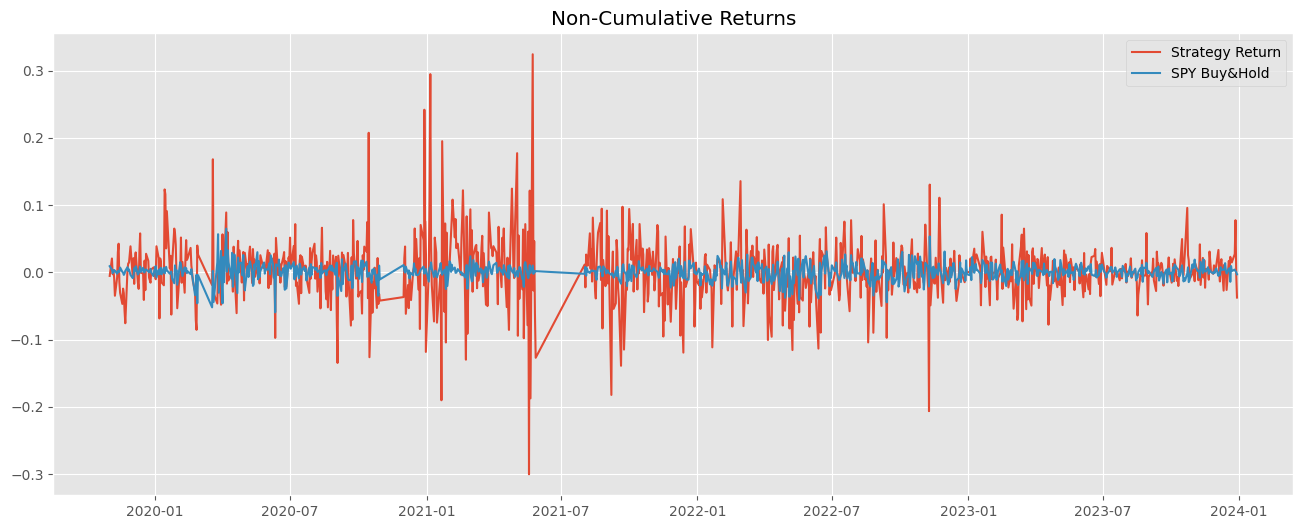

In [45]:
# Plotting non-cumulative returns
plt.figure(figsize=(16, 6))
plt.plot(portfolio_df.index, portfolio_df['Strategy Return'], label='Strategy Return')
plt.plot(portfolio_df.index, portfolio_df['SPY Buy&Hold'], label='SPY Buy&Hold')
plt.legend()
plt.title('Non-Cumulative Returns')
plt.show()

## Cumulative / Compounding

In [46]:
import matplotlib.ticker as mtick

plt.style.use('ggplot')

portfolio_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum())-1
portfolio_cumulative_return

,Strategy Return,SPY Buy&Hold
date,,
2019-11-01,-0.005237,0.009221
2019-11-04,0.015303,0.013268
2019-11-05,0.012580,0.012146
2019-11-06,0.015646,0.012377
2019-11-07,0.007195,0.015931
...,...,...
2023-12-22,2.322575,0.495846
2023-12-26,2.412954,0.502149
2023-12-27,2.677757,0.504862


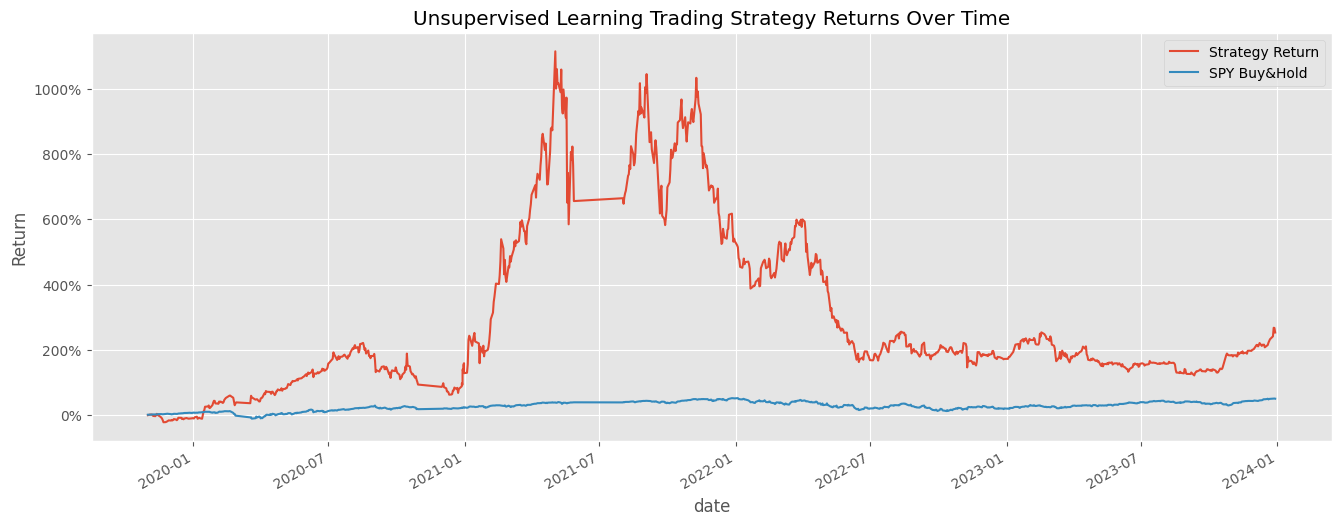

In [47]:
portfolio_cumulative_return[:'2024-01-01'].plot(figsize=(16,6))

plt.title('Unsupervised Learning Trading Strategy Returns Over Time')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')

plt.show()

## Multi Benchmark

## non cumulative

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


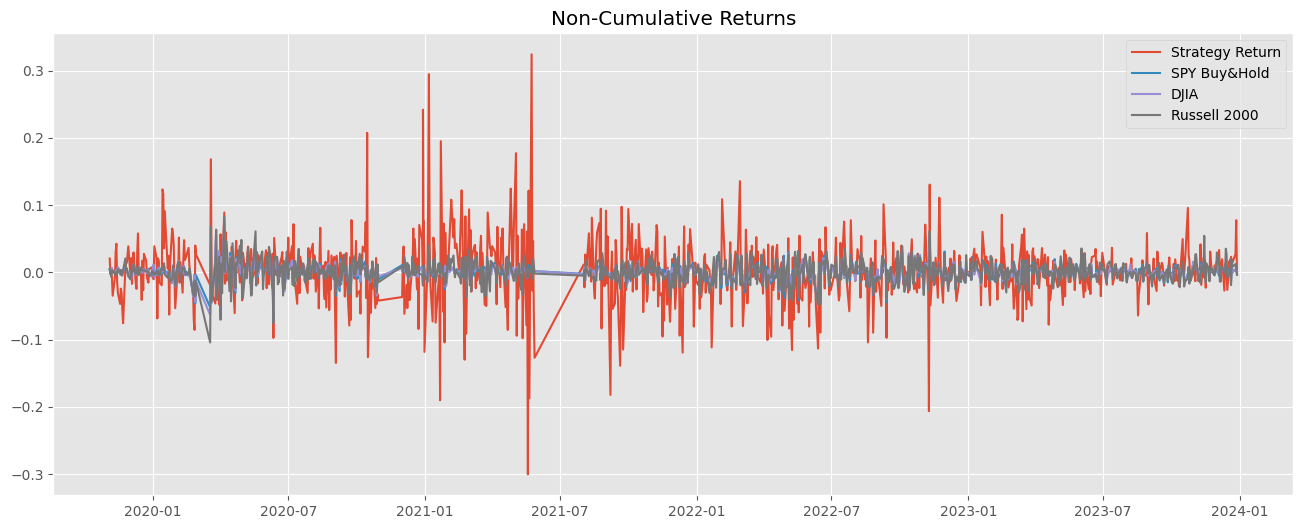

In [48]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Function to fetch index data
def get_index_data(ticker, start_date, end_date):
    index_data = yf.download(ticker, start=start_date, end=end_date)
    return index_data['Adj Close'].pct_change().dropna()

# Assuming your DataFrame is named 'portfolio_df' with the date as the index
start_date = portfolio_df.index[0]
end_date = portfolio_df.index[-1]

# Get data for additional indices
djia_data = get_index_data('^DJI', start_date, end_date)  # Dow Jones Industrial Average
russell2000_data = get_index_data('^RUT', start_date, end_date)  # Russell 2000 Index
#agg_bond_data = get_index_data('AGG', start_date, end_date)  # Barclays U.S. Aggregate Bond Index

# Merge data with the original DataFrame using merge
portfolio_df = portfolio_df.merge(djia_data, left_index=True, right_index=True)
portfolio_df = portfolio_df.merge(russell2000_data, left_index=True, right_index=True)
#portfolio_df = portfolio_df.merge(agg_bond_data, left_index=True, right_index=True)

# Rename columns
portfolio_df.columns = ['Strategy Return', 'SPY Buy&Hold', 'DJIA', 'Russell 2000']

# Save the DataFrame to a CSV file
portfolio_df.to_csv('your_file_with_indices.csv')

# Plotting non-cumulative returns
plt.figure(figsize=(16, 6))
plt.plot(portfolio_df.index, portfolio_df['Strategy Return'], label='Strategy Return')
plt.plot(portfolio_df.index, portfolio_df['SPY Buy&Hold'], label='SPY Buy&Hold')
plt.plot(portfolio_df.index, portfolio_df['DJIA'], label='DJIA')
plt.plot(portfolio_df.index, portfolio_df['Russell 2000'], label='Russell 2000')
plt.legend()
plt.title('Non-Cumulative Returns')
plt.show()

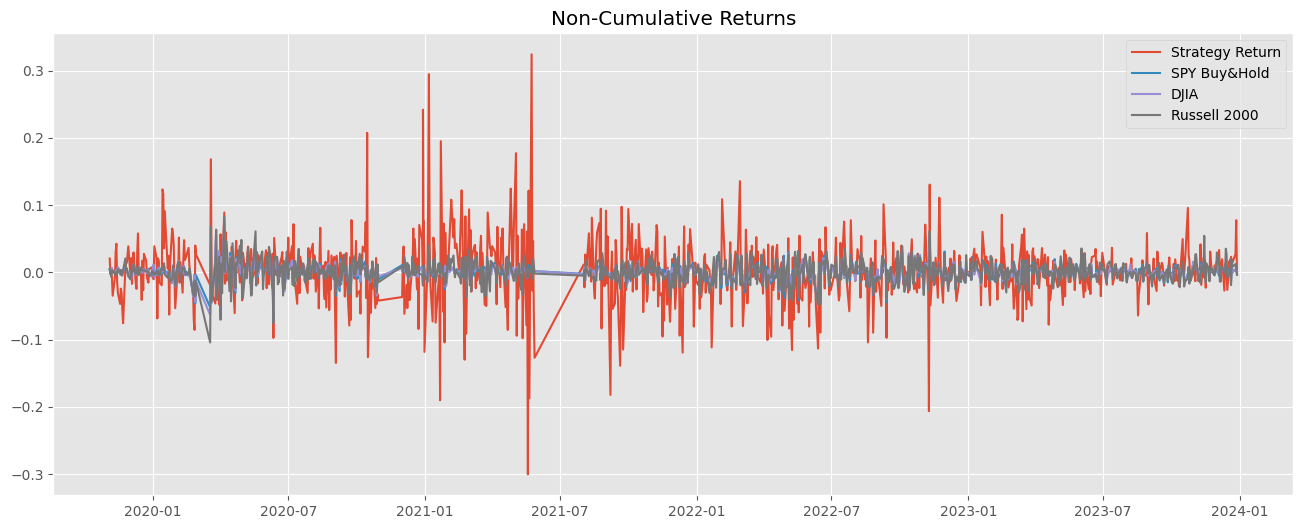

In [49]:
import matplotlib.pyplot as plt

# Plotting non-cumulative returns
plt.figure(figsize=(16, 6))
plt.plot(portfolio_df.index, portfolio_df['Strategy Return'], label='Strategy Return')
plt.plot(portfolio_df.index, portfolio_df['SPY Buy&Hold'], label='SPY Buy&Hold')
plt.plot(portfolio_df.index, portfolio_df['DJIA'], label='DJIA')
plt.plot(portfolio_df.index, portfolio_df['Russell 2000'], label='Russell 2000')
#plt.plot(portfolio_df.index, portfolio_df['Barclays U.S. Bond'], label='Barclays U.S. Bond')
plt.legend()
plt.title('Non-Cumulative Returns')
plt.show()


## cumulative

In [50]:
import matplotlib.ticker as mtick

plt.style.use('ggplot')

portfolio_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum())-1
portfolio_cumulative_return.to_csv('MultiBenchmark_CumulativeReturns.csv')
portfolio_cumulative_return

,Strategy Return,SPY Buy&Hold,DJIA,Russell 2000
2019-11-04,0.020648,0.004010,0.004196,0.005078
2019-11-05,0.017910,0.002898,0.005312,0.006468
2019-11-06,0.020992,0.003127,0.005310,0.000132
2019-11-07,0.012497,0.006649,0.011973,0.002932
2019-11-08,-0.022649,0.009128,0.012209,0.005996
...,...,...,...,...
2023-12-21,2.291304,0.479209,0.357324,0.329524
2023-12-22,2.340066,0.482178,0.356657,0.340664
2023-12-26,2.430920,0.488424,0.362440,0.357294
2023-12-27,2.697118,0.491113,0.366475,0.361921


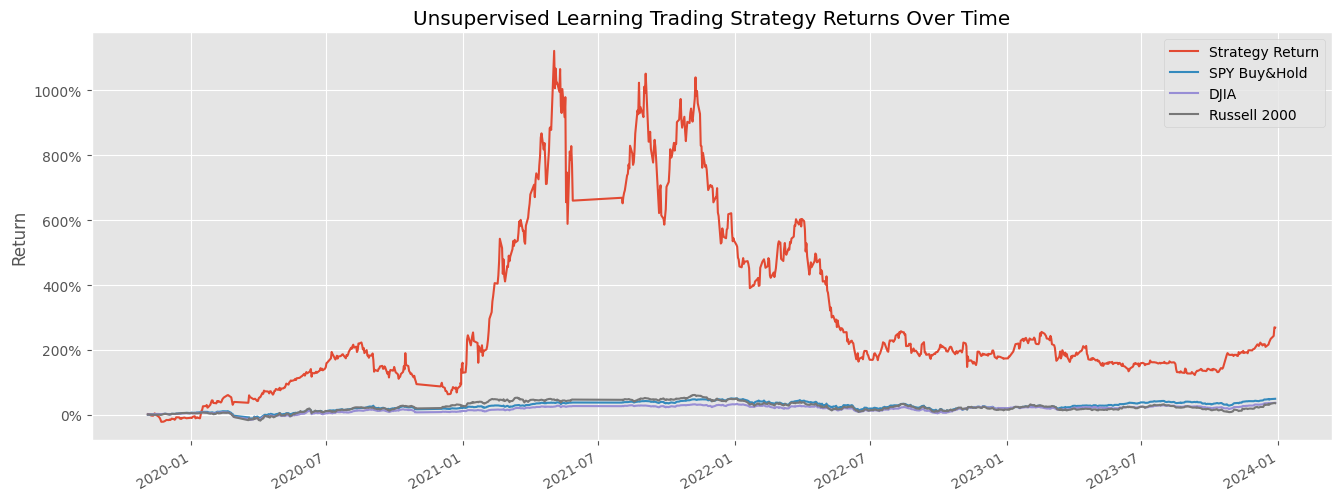

In [51]:
portfolio_cumulative_return[:'2024-01-01'].plot(figsize=(16,6))

plt.title('Unsupervised Learning Trading Strategy Returns Over Time')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')

plt.show()

In [52]:
# portfolio_df['Compounded Return'] = (1 + portfolio_df['Strategy Return']).cumprod() - 1

In [53]:
# portfolio_df

In [54]:
# portfolio_df['Cumulative Strategy Return'] = (1 + portfolio_df['Strategy Return']).cumprod() - 1
# portfolio_df['Cumulative SPY Buy&Hold Return'] = (1 + portfolio_df['SPY Buy&Hold']).cumprod() - 1

In [55]:
# portfolio_df

In [56]:
# import matplotlib.pyplot as plt

# # Plotting
# plt.figure(figsize=(20, 6))
# plt.plot(portfolio_df['Cumulative Strategy Return'], label='Portfolio Strategy')
# plt.plot(portfolio_df['Cumulative SPY Buy&Hold Return'], label='SPY Buy&Hold')
# plt.title('Cumulative Returns Comparison')
# plt.xlabel('Date')
# plt.ylabel('Cumulative Return')
# plt.legend()
# plt.show()